In [1]:
import numpy as np
import pandas as pd


In [7]:
df = pd.read_csv(r"../dataset/kidney_disease.csv")
df.head()

id   age    bp     sg   al   su     rbc        pc         pcc          ba  \
0   0  48.0  80.0  1.020  1.0  0.0     NaN    normal  notpresent  notpresent   
1   1   7.0  50.0  1.020  4.0  0.0     NaN    normal  notpresent  notpresent   
2   2  62.0  80.0  1.010  2.0  3.0  normal    normal  notpresent  notpresent   
3   3  48.0  70.0  1.005  4.0  0.0  normal  abnormal     present  notpresent   
4   4  51.0  80.0  1.010  2.0  0.0  normal    normal  notpresent  notpresent   

   ...  pcv    wc   rc  htn   dm  cad appet   pe  ane classification  
0  ...   44  7800  5.2  yes  yes   no  good   no   no            ckd  
1  ...   38  6000  NaN   no   no   no  good   no   no            ckd  
2  ...   31  7500  NaN   no  yes   no  poor   no  yes            ckd  
3  ...   32  6700  3.9  yes   no   no  poor  yes  yes            ckd  
4  ...   35  7300  4.6   no   no   no  good   no   no            ckd  

[5 rows x 26 columns]

In [8]:
df.shape

(400, 26)

In [9]:
df.columns

Index(['id', 'age', 'bp', 'sg', 'al', 'su', 'rbc', 'pc', 'pcc', 'ba', 'bgr',
       'bu', 'sc', 'sod', 'pot', 'hemo', 'pcv', 'wc', 'rc', 'htn', 'dm', 'cad',
       'appet', 'pe', 'ane', 'classification'],
      dtype='object')

In [10]:
df.isnull().sum()

id                  0
age                 9
bp                 12
sg                 47
al                 46
su                 49
rbc               152
pc                 65
pcc                 4
ba                  4
bgr                44
bu                 19
sc                 17
sod                87
pot                88
hemo               52
pcv                70
wc                105
rc                130
htn                 2
dm                  2
cad                 2
appet               1
pe                  1
ane                 1
classification      0
dtype: int64

In [11]:
# Step 3: Standardize column names (remove extra spaces)
df.columns = df.columns.str.strip()

In [12]:
# Step 4: Remove duplicate rows (if any)
df.drop_duplicates(inplace=True)

In [13]:
# Check column data types
cat_cols = df.select_dtypes(include='object').columns
num_cols = df.select_dtypes(include='number').columns

In [14]:
# Fill missing numeric columns with median
for col in num_cols:
    df[col] = df[col].fillna(df[col].median())

In [15]:
# Fill missing categorical columns with mode
for col in cat_cols:
    df[col] = df[col].fillna(df[col].mode()[0])

In [16]:
from sklearn.preprocessing import LabelEncoder

# Step 6: Encode categorical variables
le = LabelEncoder()
for col in cat_cols:
    df[col] = le.fit_transform(df[col])

In [17]:
print("\nCleaned Dataset Info:")
print(df.info())
print("\nMissing values after cleaning:\n", df.isnull().sum())


Cleaned Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 26 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   id              400 non-null    int64  
 1   age             400 non-null    float64
 2   bp              400 non-null    float64
 3   sg              400 non-null    float64
 4   al              400 non-null    float64
 5   su              400 non-null    float64
 6   rbc             400 non-null    int64  
 7   pc              400 non-null    int64  
 8   pcc             400 non-null    int64  
 9   ba              400 non-null    int64  
 10  bgr             400 non-null    float64
 11  bu              400 non-null    float64
 12  sc              400 non-null    float64
 13  sod             400 non-null    float64
 14  pot             400 non-null    float64
 15  hemo            400 non-null    float64
 16  pcv             400 non-null    int64  
 17  wc          

In [18]:
print("\nSample of cleaned dataset:")
print(df.head())


Sample of cleaned dataset:
   id   age    bp     sg   al   su  rbc  pc  pcc  ba  ...  pcv  wc  rc  htn  \
0   0  48.0  80.0  1.020  1.0  0.0    1   1    0   0  ...   32  72  34    1   
1   1   7.0  50.0  1.020  4.0  0.0    1   1    0   0  ...   26  56  34    0   
2   2  62.0  80.0  1.010  2.0  3.0    1   1    0   0  ...   19  70  34    0   
3   3  48.0  70.0  1.005  4.0  0.0    1   0    1   0  ...   20  62  19    1   
4   4  51.0  80.0  1.010  2.0  0.0    1   1    0   0  ...   23  68  27    0   

   dm  cad  appet  pe  ane  classification  
0   4    1      0   0    0               0  
1   3    1      0   0    0               0  
2   4    1      1   0    1               0  
3   3    1      1   1    1               0  
4   3    1      0   0    0               0  

[5 rows x 26 columns]


In [19]:
# Print original column names
print("Original Columns:\n", df.columns.tolist())

Original Columns:
 ['id', 'age', 'bp', 'sg', 'al', 'su', 'rbc', 'pc', 'pcc', 'ba', 'bgr', 'bu', 'sc', 'sod', 'pot', 'hemo', 'pcv', 'wc', 'rc', 'htn', 'dm', 'cad', 'appet', 'pe', 'ane', 'classification']


In [21]:
# Rename columns for clarity and consistency
df.rename(columns={
    'id': 'id',
    'age': 'age',
    'bp': 'blood_pressure',
    'sg': 'specific_gravity',
    'al': 'albumin',
    'su': 'sugar',
    'rbc': 'red_blood_cells',
    'pc': 'pus_cell',
    'pcc': 'pus_cell_clumps',
    'ba': 'bacteria',
    'bgr': 'blood_glucose_random',
    'bu': 'blood_urea',
    'sc': 'serum_creatinine',
    'sod': 'sodium',
    'pot': 'potassium',
    'hemo': 'hemoglobin',
    'pcv': 'packed_cell_volume',
    'wc': 'white_blood_cell_count',
    'rc': 'red_blood_cell_count',
    'htn': 'hypertension',
    'dm': 'diabetes_mellitus',
    'cad': 'coronary_artery_disease',
    'appet': 'appetite',
    'pe': 'pedal_edema',
    'ane': 'anemia',
    'classification': 'target'
}, inplace=True)


In [22]:
# Confirm renamed columns
print("\nRenamed Columns:\n", df.columns.tolist())


Renamed Columns:
 ['id', 'age', 'blood_pressure', 'specific_gravity', 'albumin', 'sugar', 'red_blood_cells', 'pus_cell', 'pus_cell_clumps', 'bacteria', 'blood_glucose_random', 'blood_urea', 'serum_creatinine', 'sodium', 'potassium', 'hemoglobin', 'packed_cell_volume', 'white_blood_cell_count', 'red_blood_cell_count', 'hypertension', 'diabetes_mellitus', 'coronary_artery_disease', 'appetite', 'pedal_edema', 'anemia', 'target']


In [23]:
from sklearn.preprocessing import LabelEncoder

# Copy of dataset
df_encoded = df.copy()

In [24]:
# Step 1: Identify categorical columns (object type)
cat_cols = df_encoded.select_dtypes(include='object').columns
print("Categorical Columns:\n", cat_cols.tolist())

Categorical Columns:
 []


In [25]:
# Step 2: Apply Label Encoding
le = LabelEncoder()
for col in cat_cols:
    df_encoded[col] = le.fit_transform(df_encoded[col])

In [26]:
# Step 3: Check if encoding is done
print("\nDataset after Label Encoding:\n")
print(df_encoded.head())


Dataset after Label Encoding:

   id   age  blood_pressure  specific_gravity  albumin  sugar  \
0   0  48.0            80.0             1.020      1.0    0.0   
1   1   7.0            50.0             1.020      4.0    0.0   
2   2  62.0            80.0             1.010      2.0    3.0   
3   3  48.0            70.0             1.005      4.0    0.0   
4   4  51.0            80.0             1.010      2.0    0.0   

   red_blood_cells  pus_cell  pus_cell_clumps  bacteria  ...  \
0                1         1                0         0  ...   
1                1         1                0         0  ...   
2                1         1                0         0  ...   
3                1         0                1         0  ...   
4                1         1                0         0  ...   

   packed_cell_volume  white_blood_cell_count  red_blood_cell_count  \
0                  32                      72                    34   
1                  26                      56     

In [27]:
# Optional: Check data types
print("\nUpdated Data Types:\n", df_encoded.dtypes)


Updated Data Types:
 id                           int64
age                        float64
blood_pressure             float64
specific_gravity           float64
albumin                    float64
sugar                      float64
red_blood_cells              int64
pus_cell                     int64
pus_cell_clumps              int64
bacteria                     int64
blood_glucose_random       float64
blood_urea                 float64
serum_creatinine           float64
sodium                     float64
potassium                  float64
hemoglobin                 float64
packed_cell_volume           int64
white_blood_cell_count       int64
red_blood_cell_count         int64
hypertension                 int64
diabetes_mellitus            int64
coronary_artery_disease      int64
appetite                     int64
pedal_edema                  int64
anemia                       int64
target                       int64
dtype: object


In [28]:
import pandas as pd
from sklearn.preprocessing import StandardScaler

# Assuming df is already cleaned and label encoded
df_numerical = df_encoded.copy()


In [30]:
# Step 1: Identify numerical columns
num_cols = df_numerical.select_dtypes(include=['int64', 'float64']).columns.tolist()

In [31]:
# Optional: If any numeric columns were misclassified as object, convert them
# Example: packed_cell_volume, white_blood_cell_count, red_blood_cell_count might be object due to mixed values
for col in df_numerical.columns:
    df_numerical[col] = pd.to_numeric(df_numerical[col], errors='coerce')

In [32]:
# Step 2: Fill any remaining NaN in numeric columns with median
for col in num_cols:
    df_numerical[col] = df_numerical[col].fillna(df_numerical[col].median())

In [33]:
# Step 3: Standardize numerical features (mean = 0, std = 1)
scaler = StandardScaler()
df_numerical[num_cols] = scaler.fit_transform(df_numerical[num_cols])

In [34]:
# Final check
print("\nStandardized Numerical Columns Preview:\n")
print(df_numerical[num_cols].head())

# Full dataset preview
print("\nFinal dataset shape:", df_numerical.shape)
print(df_numerical.head())


Standardized Numerical Columns Preview:

         id       age  blood_pressure  specific_gravity   albumin     sugar  \
0 -1.727726 -0.210031        0.254214          0.421486  0.076249 -0.380269   
1 -1.719066 -2.627234       -1.972476          0.421486  2.363728 -0.380269   
2 -1.710406  0.615355        0.254214         -1.421074  0.838742  2.507853   
3 -1.701745 -0.210031       -0.488016         -2.342354  2.363728 -0.380269   
4 -1.693085 -0.033163        0.254214         -1.421074  0.838742 -0.380269   

   red_blood_cells  pus_cell  pus_cell_clumps  bacteria  ...  \
0          0.36489  0.484322        -0.342518 -0.241249  ...   
1          0.36489  0.484322        -0.342518 -0.241249  ...   
2          0.36489  0.484322        -0.342518 -0.241249  ...   
3          0.36489 -2.064742         2.919556 -0.241249  ...   
4          0.36489  0.484322        -0.342518 -0.241249  ...   

   packed_cell_volume  white_blood_cell_count  red_blood_cell_count  \
0            0.575394      

In [35]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 26 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       400 non-null    int64  
 1   age                      400 non-null    float64
 2   blood_pressure           400 non-null    float64
 3   specific_gravity         400 non-null    float64
 4   albumin                  400 non-null    float64
 5   sugar                    400 non-null    float64
 6   red_blood_cells          400 non-null    int64  
 7   pus_cell                 400 non-null    int64  
 8   pus_cell_clumps          400 non-null    int64  
 9   bacteria                 400 non-null    int64  
 10  blood_glucose_random     400 non-null    float64
 11  blood_urea               400 non-null    float64
 12  serum_creatinine         400 non-null    float64
 13  sodium                   400 non-null    float64
 14  potassium                4

Dataset Shape: (400, 26)

Data Types:
 id                         float64
age                        float64
blood_pressure             float64
specific_gravity           float64
albumin                    float64
sugar                      float64
red_blood_cells            float64
pus_cell                   float64
pus_cell_clumps            float64
bacteria                   float64
blood_glucose_random       float64
blood_urea                 float64
serum_creatinine           float64
sodium                     float64
potassium                  float64
hemoglobin                 float64
packed_cell_volume         float64
white_blood_cell_count     float64
red_blood_cell_count       float64
hypertension               float64
diabetes_mellitus          float64
coronary_artery_disease    float64
appetite                   float64
pedal_edema                float64
anemia                     float64
target                     float64
dtype: object

Missing Values Per Column:
 id      

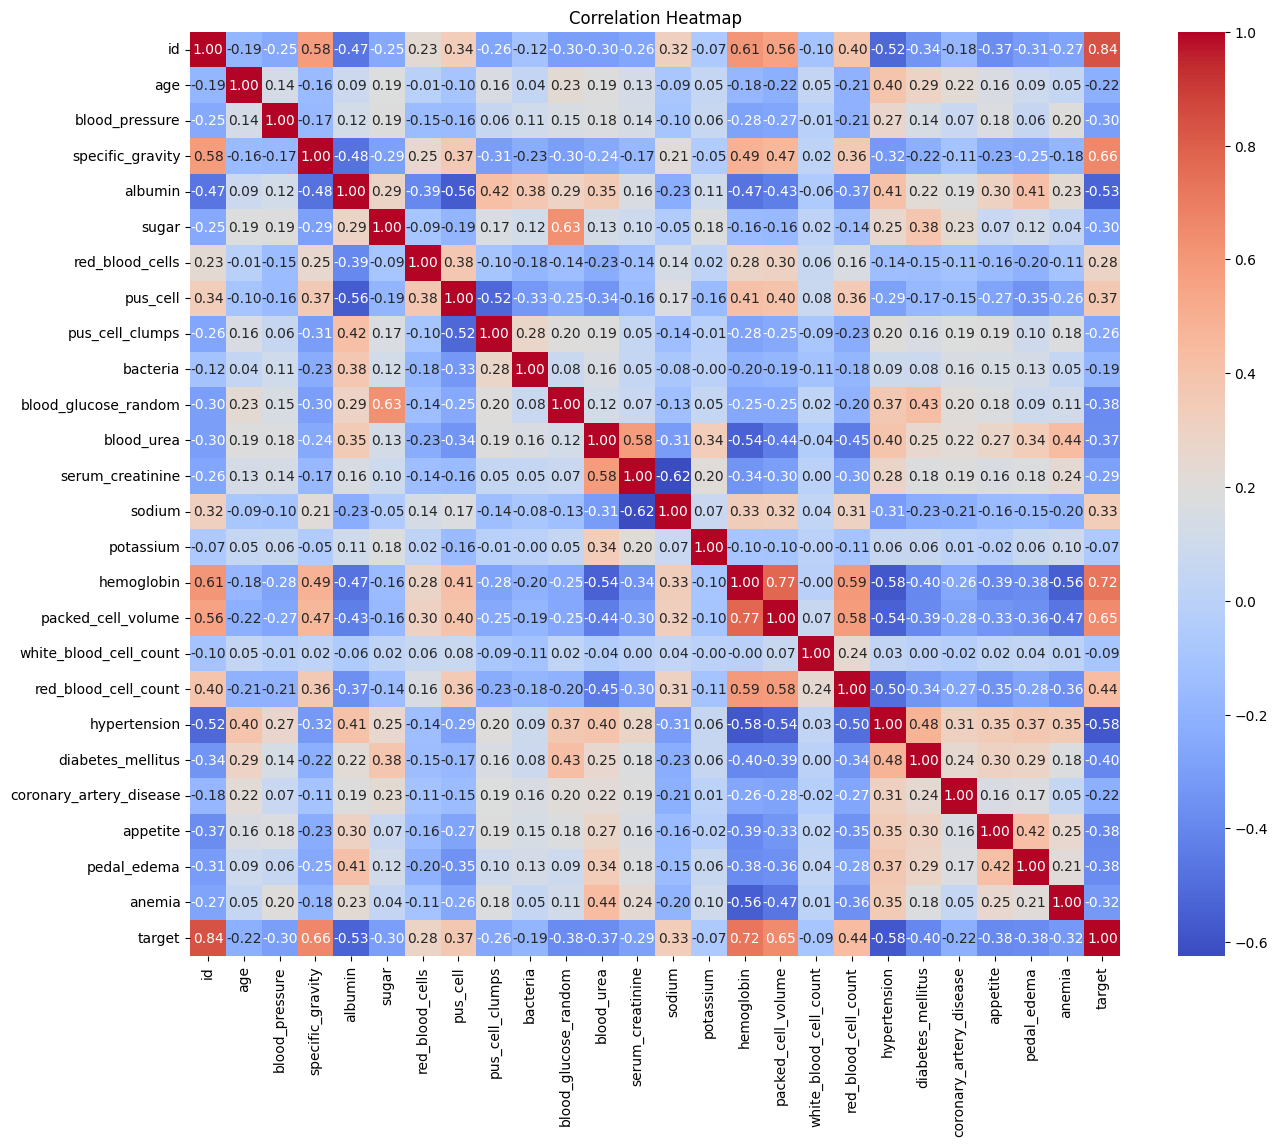

In [36]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming df_numerical is the final processed dataframe
# (numerical + encoded categorical columns)

# 1. Dataset Shape
print("Dataset Shape:", df_numerical.shape)

# 2. Data Types
print("\nData Types:\n", df_numerical.dtypes)

# 3. Missing Values Check
print("\nMissing Values Per Column:\n", df_numerical.isnull().sum())

# 4. Descriptive Statistics
print("\nDescriptive Statistics:\n", df_numerical.describe())

# 5. Skewness and Kurtosis
print("\nSkewness:\n", df_numerical.skew())
print("\nKurtosis:\n", df_numerical.kurt())

# 6. Correlation Matrix (Optional)
correlation_matrix = df_numerical.corr()

# Display correlation heatmap
plt.figure(figsize=(15, 12))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap='coolwarm')
plt.title("Correlation Heatmap")
plt.show()


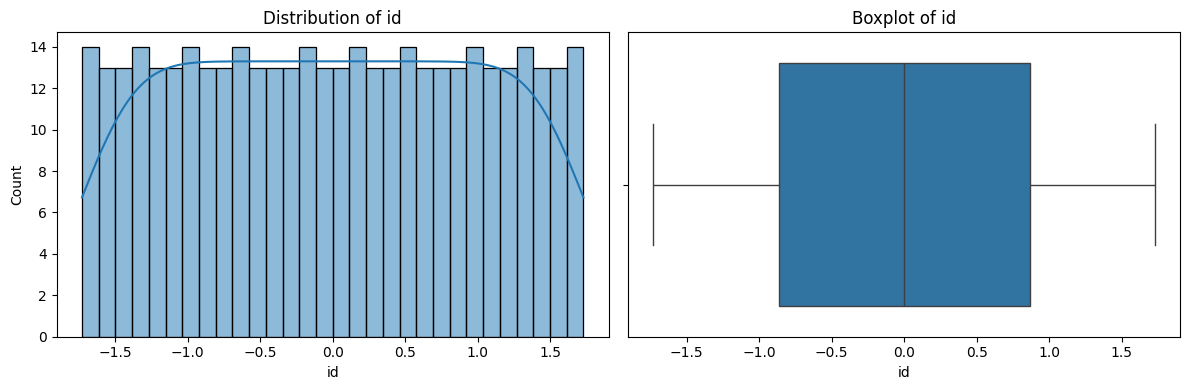

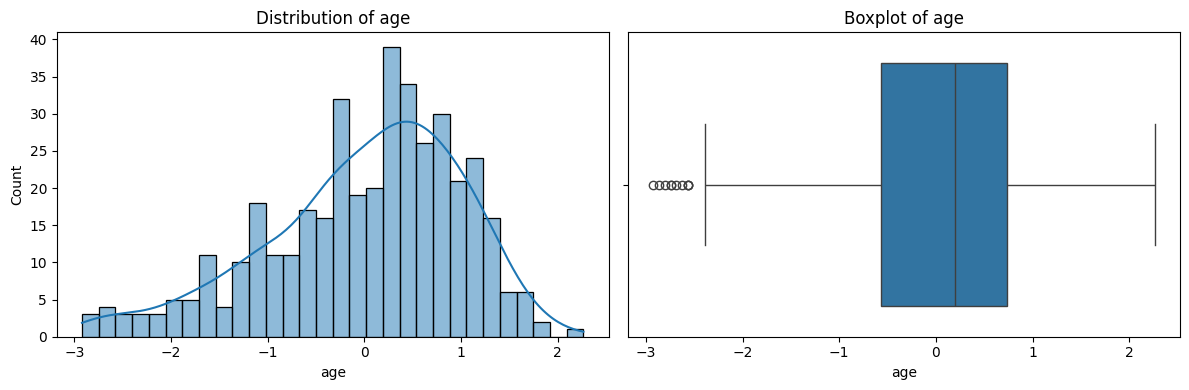

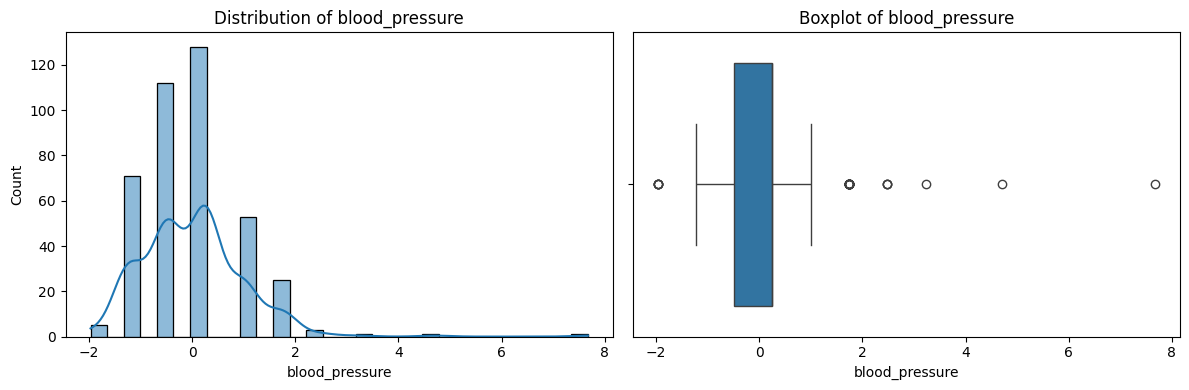

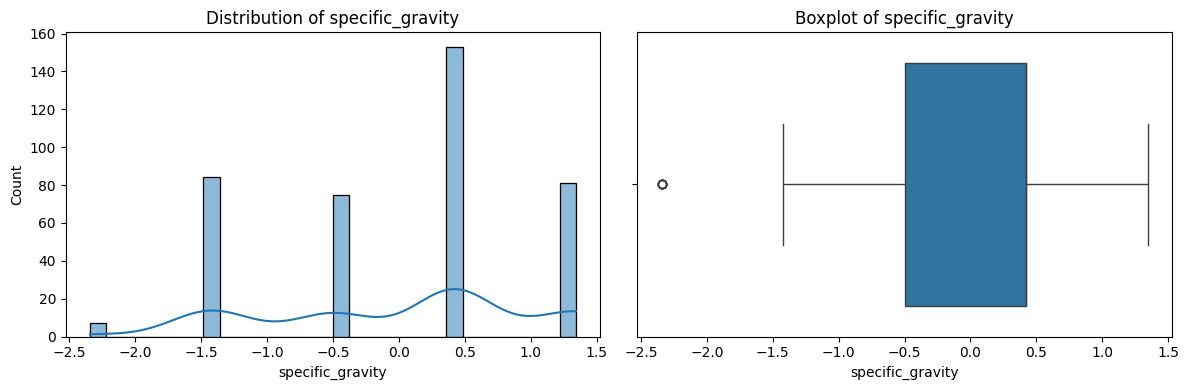

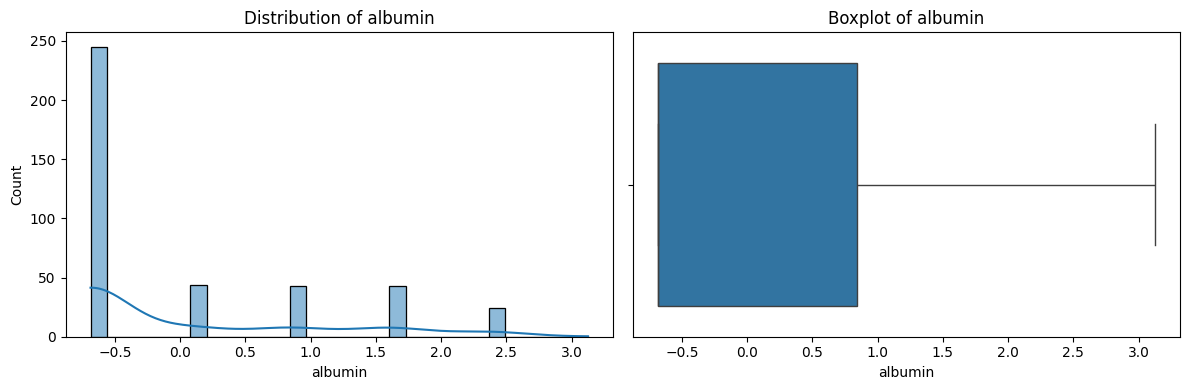

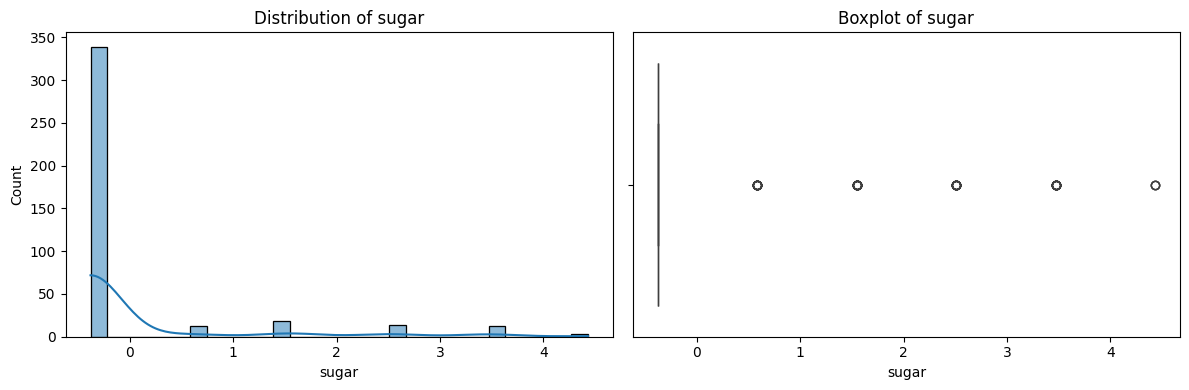

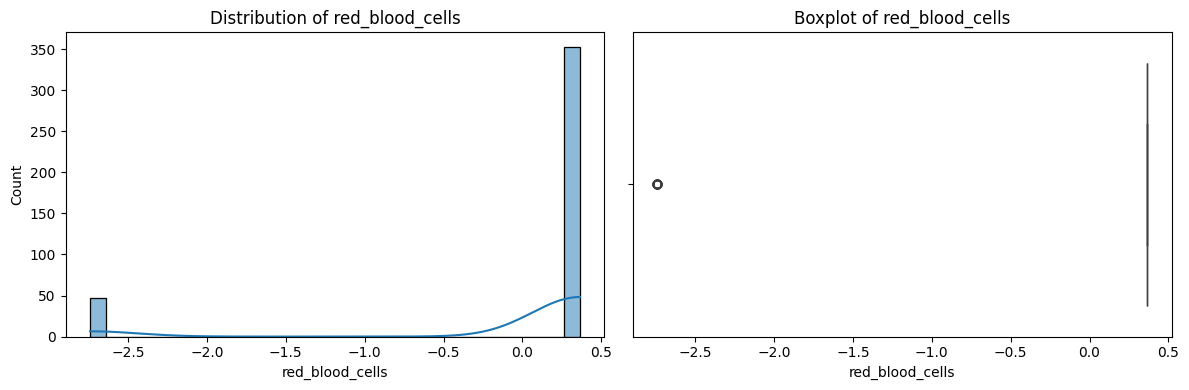

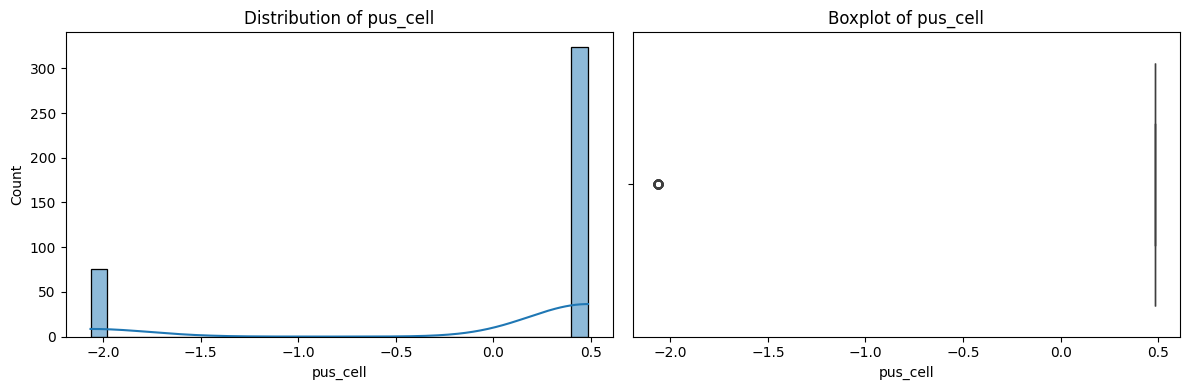

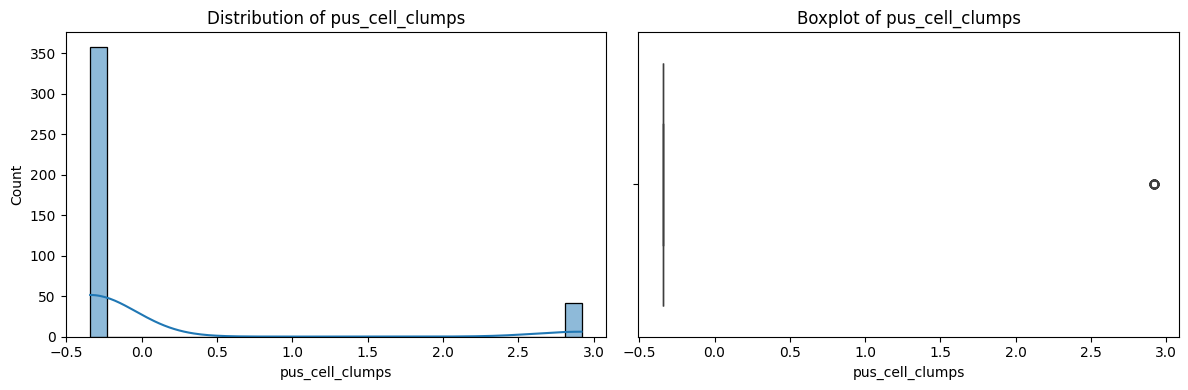

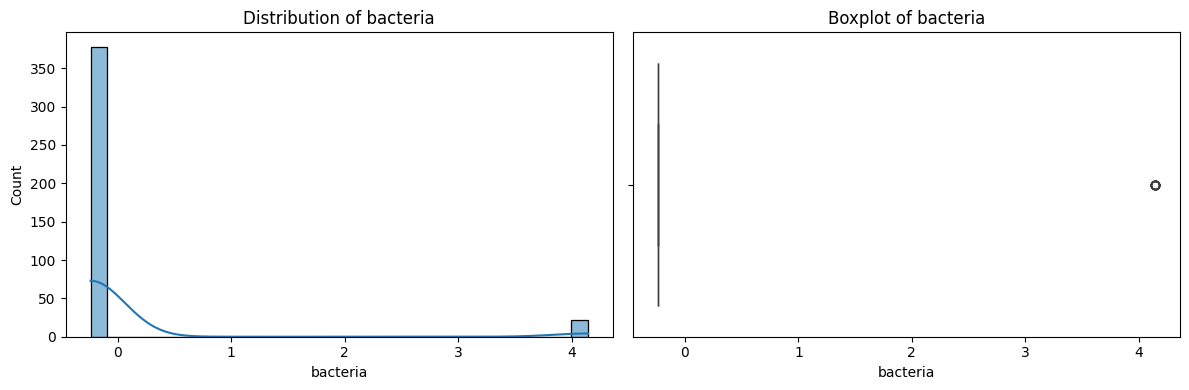

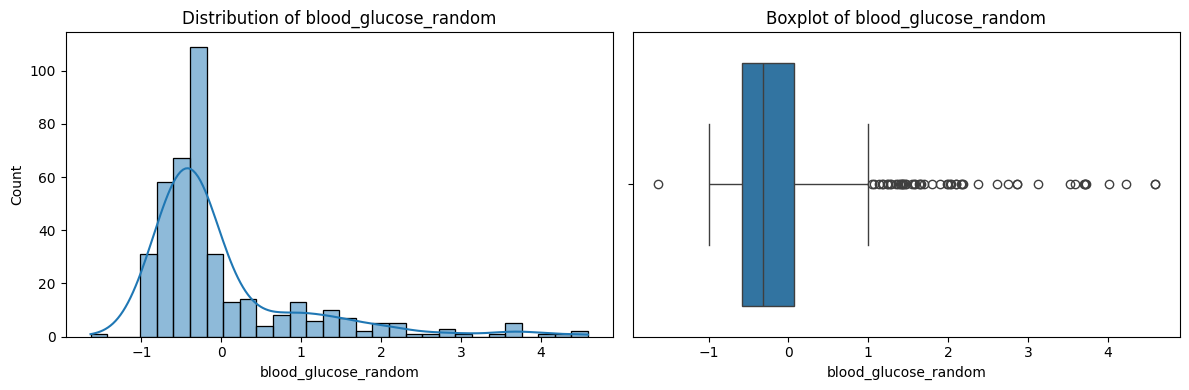

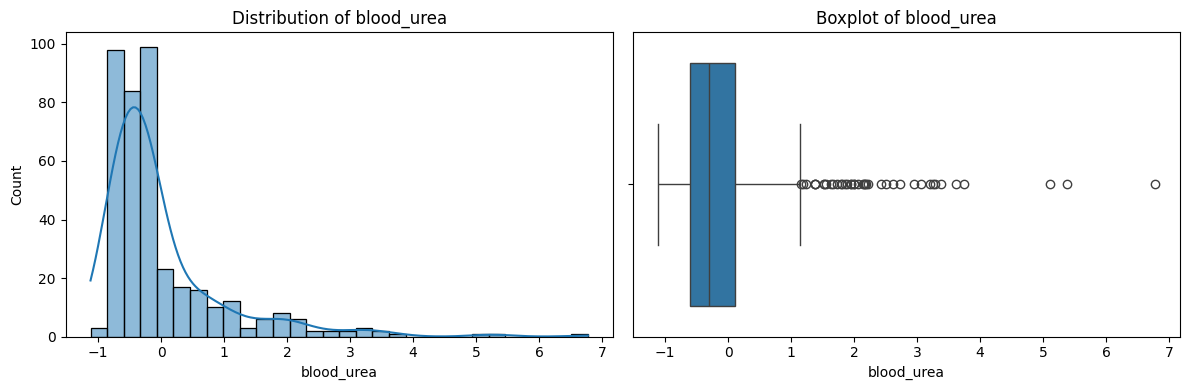

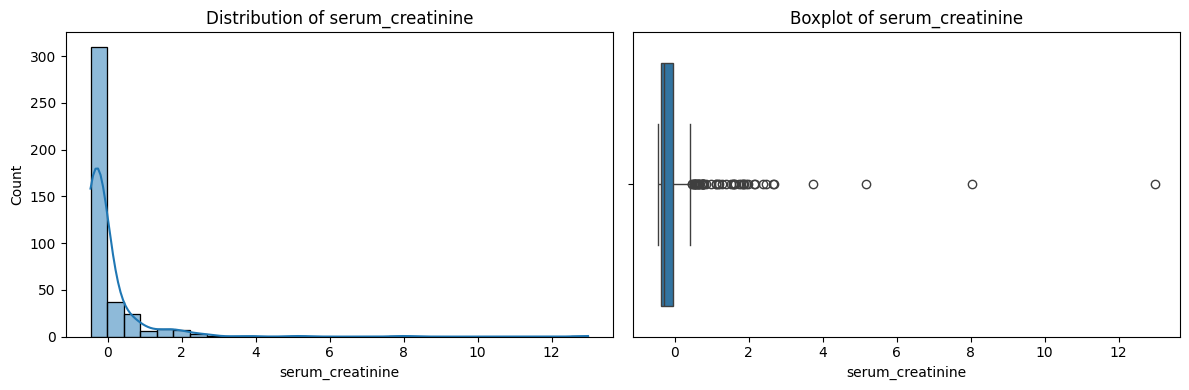

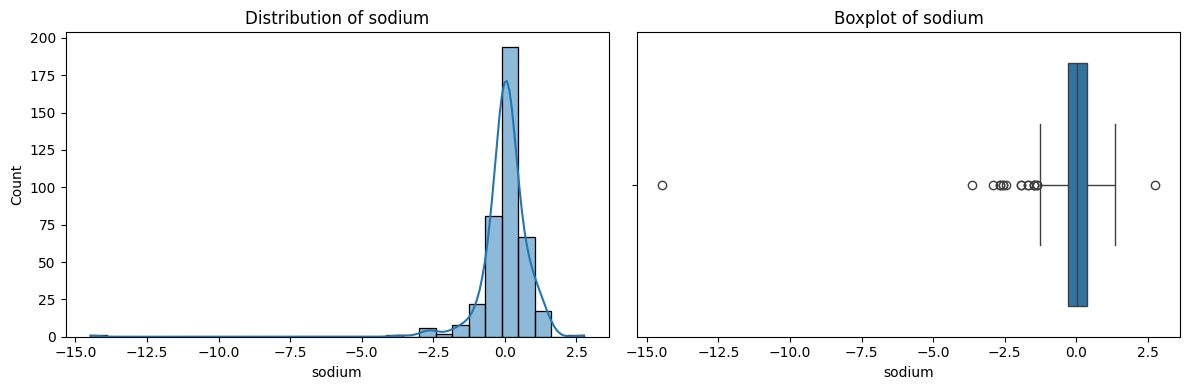

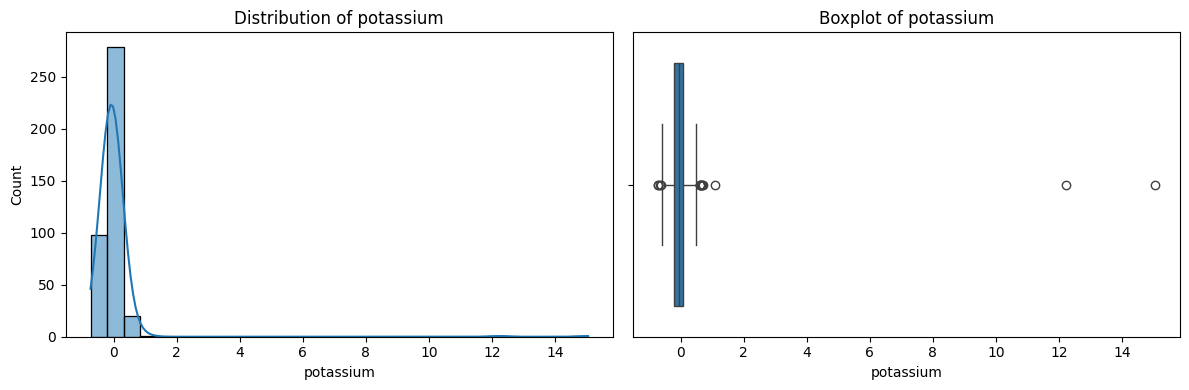

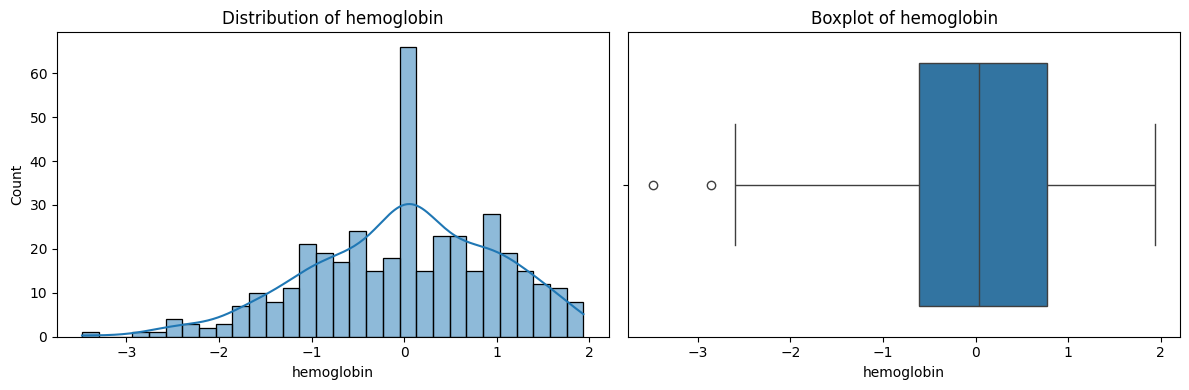

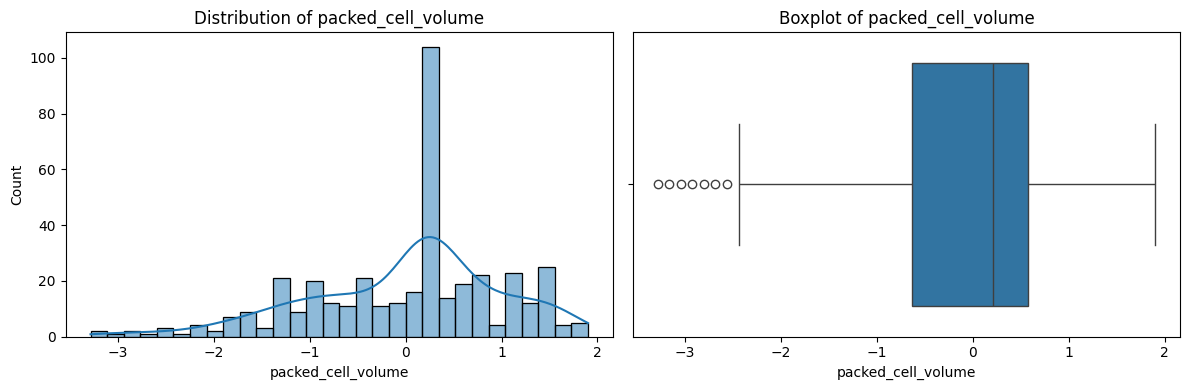

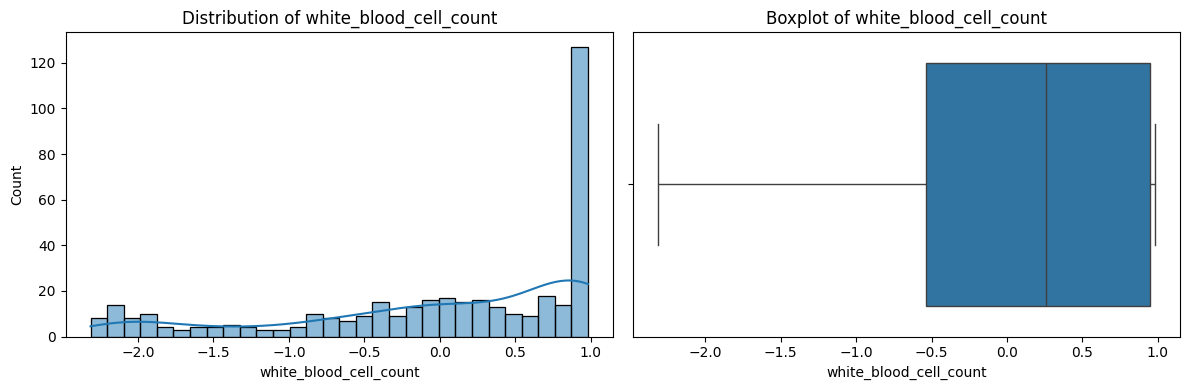

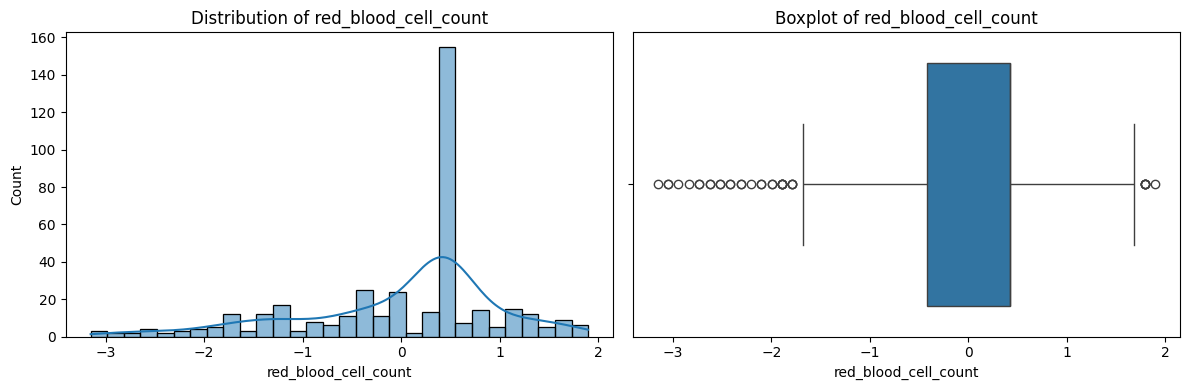

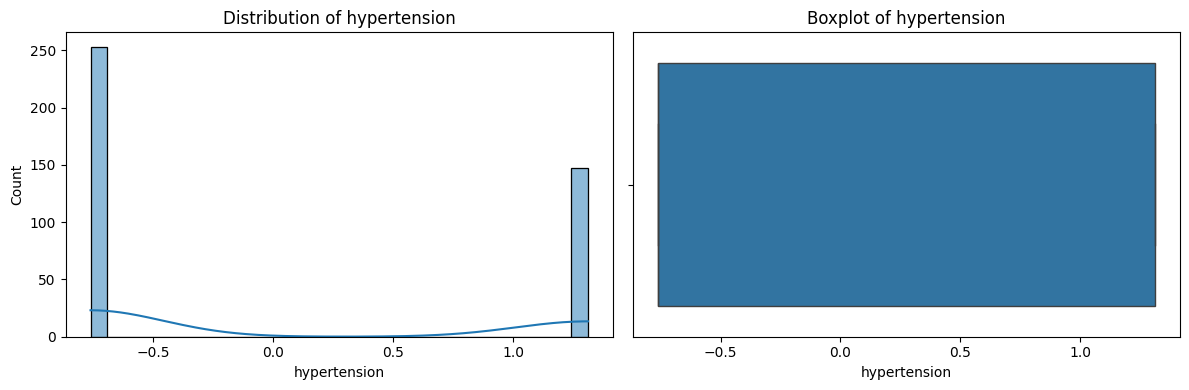

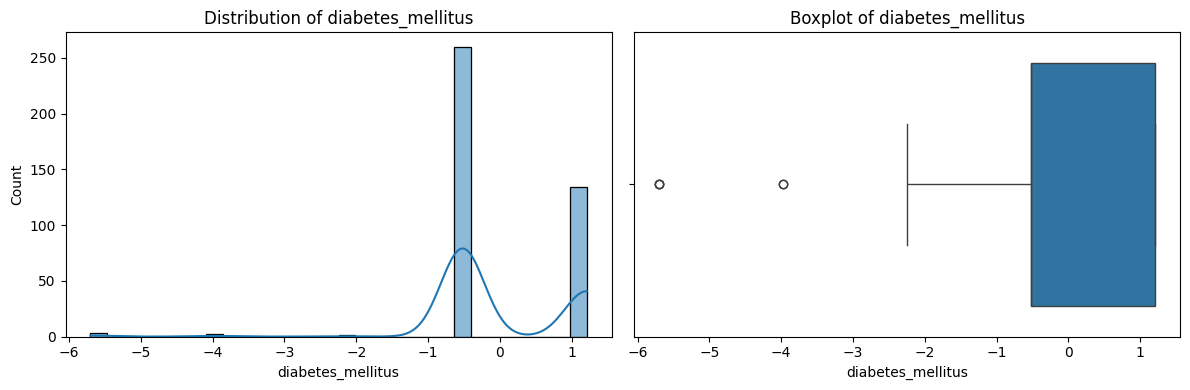

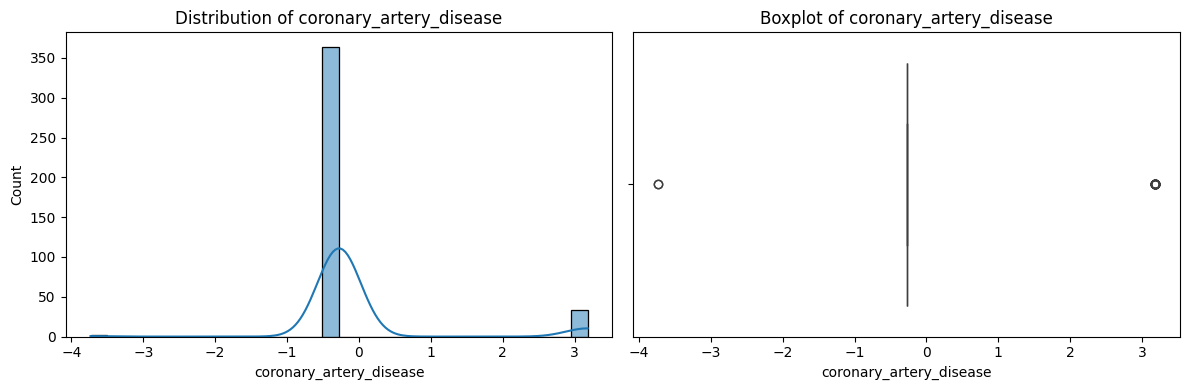

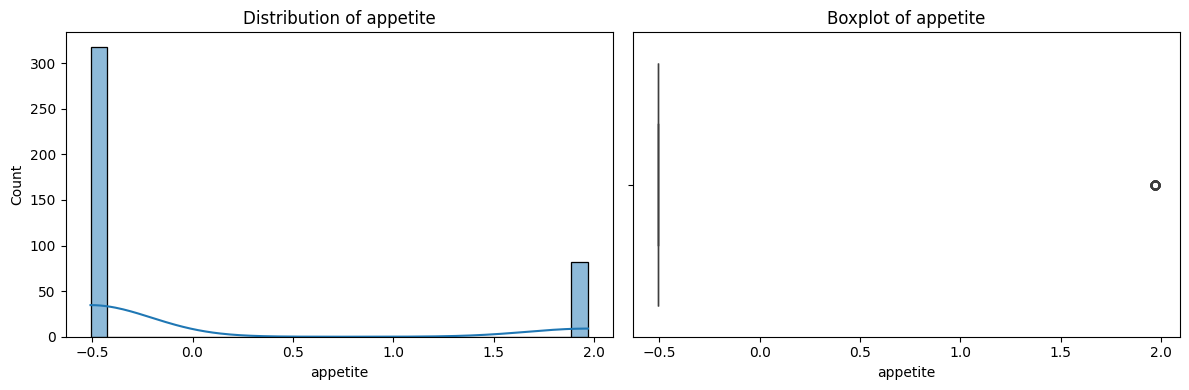

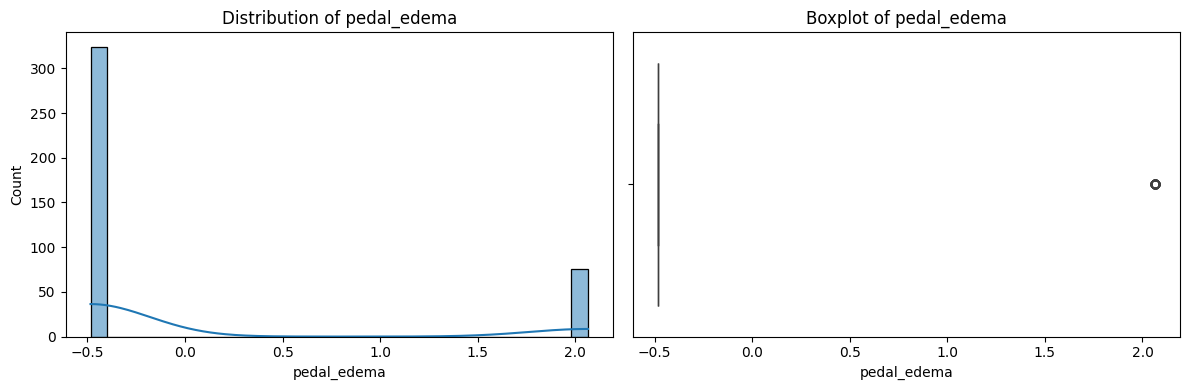

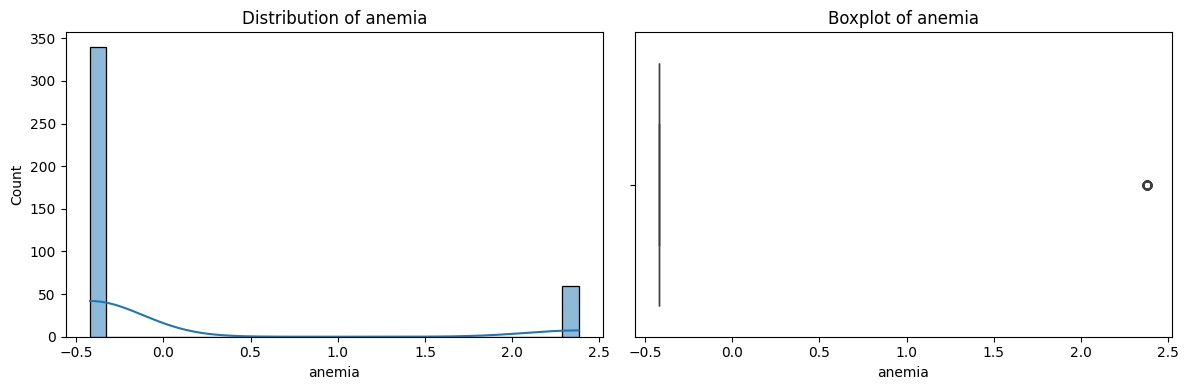

In [37]:
import matplotlib.pyplot as plt
import seaborn as sns

# Use your encoded & cleaned dataframe: df_numerical
# Separate numeric and categorical columns

# Step 1: Identify categorical & numerical columns
cat_cols = df.select_dtypes(include='object').columns.tolist()
num_cols = df_numerical.select_dtypes(include=['int64', 'float64']).columns.tolist()

# (Optional) Remove the target column if present
if 'target' in cat_cols: cat_cols.remove('target')
if 'target' in num_cols: num_cols.remove('target')

# Step 2: Univariate Analysis for Categorical Features (Countplot)
for col in cat_cols:
    plt.figure(figsize=(5, 3))
    sns.countplot(x=col, data=df)
    plt.title(f'Countplot of {col}')
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()

# Step 3: Univariate Analysis for Numerical Features (Histograms + Boxplots)
for col in num_cols:
    plt.figure(figsize=(12, 4))

    # Histogram
    plt.subplot(1, 2, 1)
    sns.histplot(df_numerical[col], kde=True, bins=30)
    plt.title(f'Distribution of {col}')

    # Boxplot
    plt.subplot(1, 2, 2)
    sns.boxplot(x=df_numerical[col])
    plt.title(f'Boxplot of {col}')

    plt.tight_layout()
    plt.show()


In [38]:
import seaborn as sns
import matplotlib.pyplot as plt

# Assume `df` is original (not encoded) and `target` column is still categorical
# Example: 'target' = 'ckd' or 'notckd'

cat_cols = df.select_dtypes(include='object').columns.tolist()

# Exclude 'target' temporarily
if 'target' in cat_cols:
    cat_cols.remove('target')

# Categorical feature vs target countplots
for col in cat_cols:
    plt.figure(figsize=(5, 3))
    sns.countplot(x=col, hue='target', data=df)
    plt.title(f'{col} vs Target')
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()


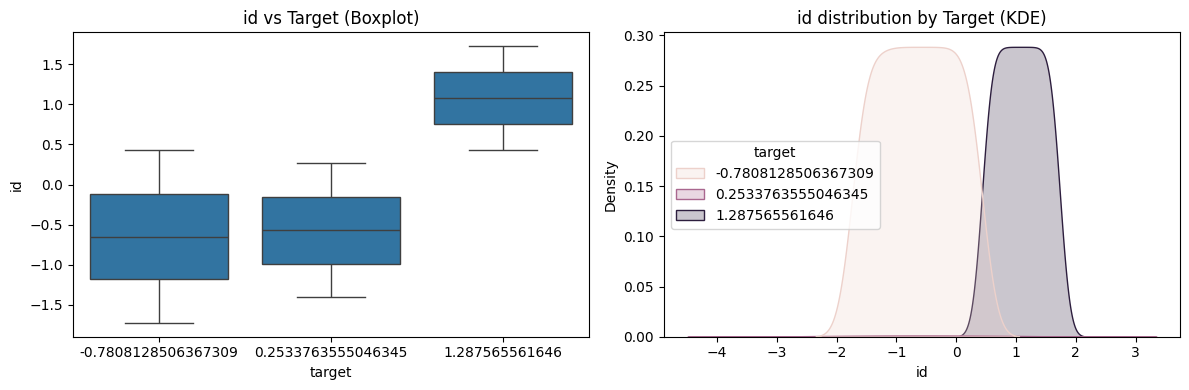

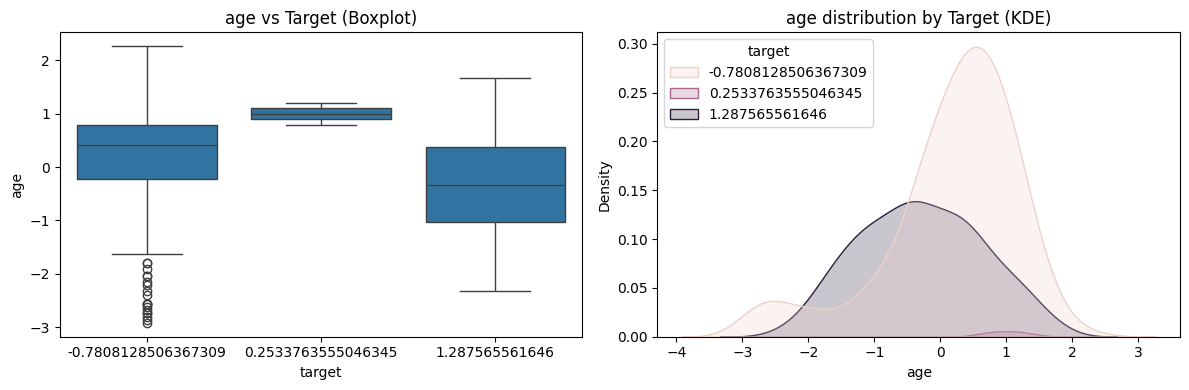

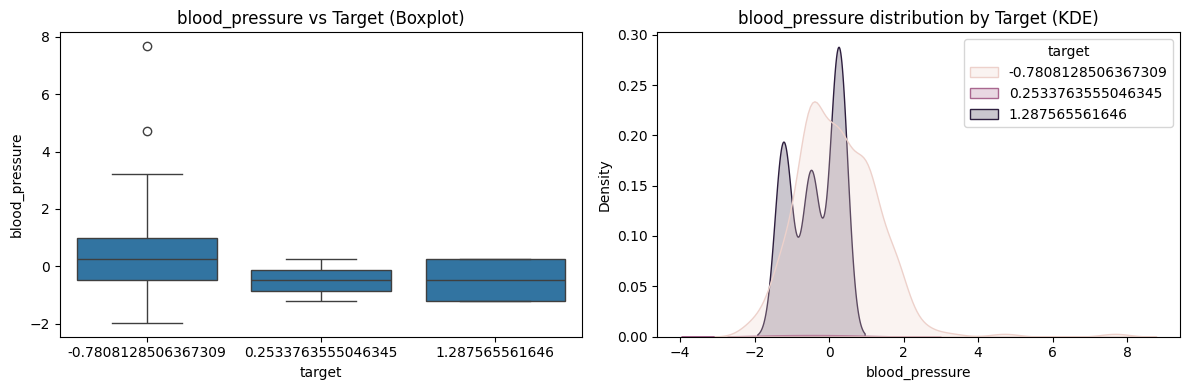

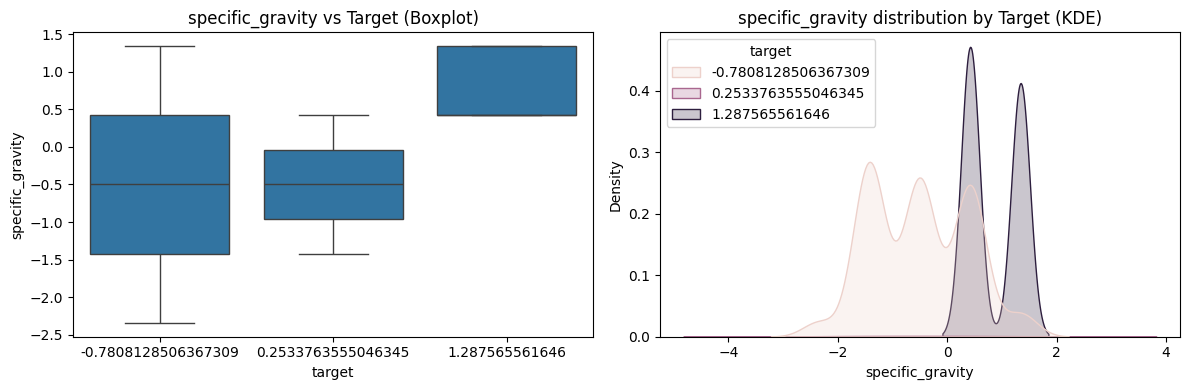

C:\Users\Disha\AppData\Local\Temp\ipykernel_24704\223497620.py:21: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.
  sns.kdeplot(data=df_numerical, x=col, hue='target', fill=True)


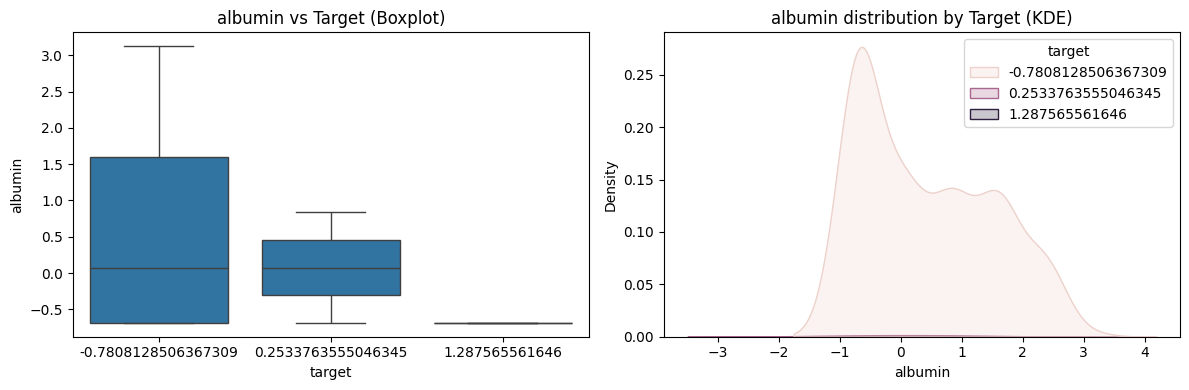

C:\Users\Disha\AppData\Local\Temp\ipykernel_24704\223497620.py:21: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.
  sns.kdeplot(data=df_numerical, x=col, hue='target', fill=True)


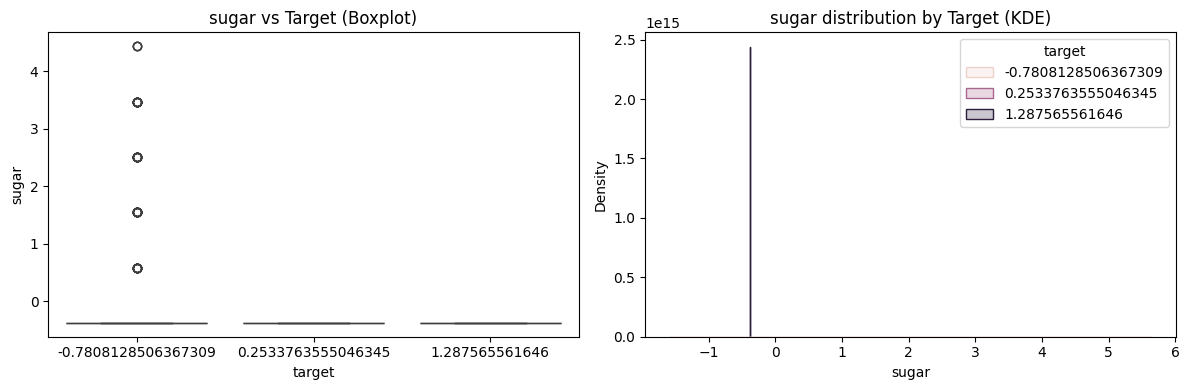

C:\Users\Disha\AppData\Local\Temp\ipykernel_24704\223497620.py:21: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.
  sns.kdeplot(data=df_numerical, x=col, hue='target', fill=True)


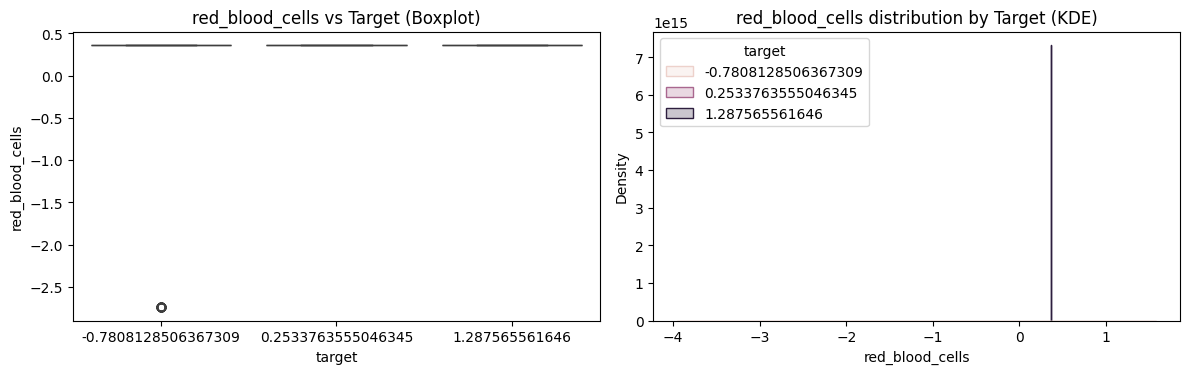

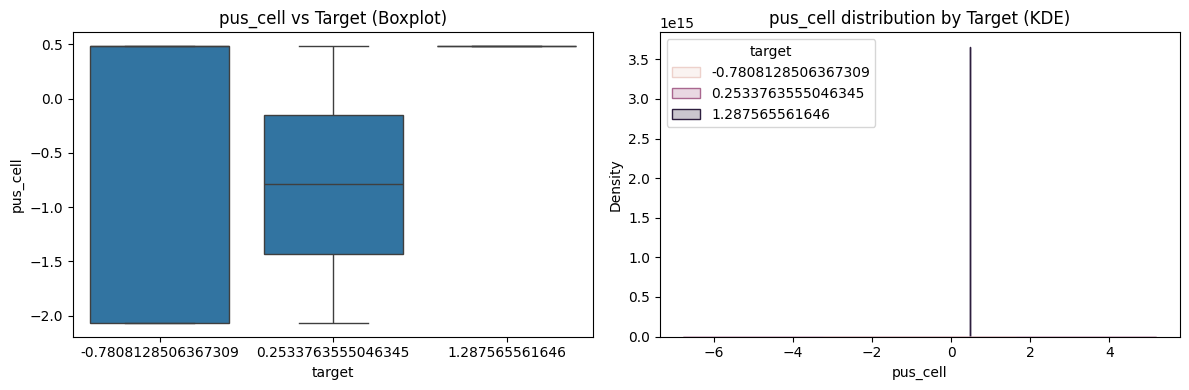

C:\Users\Disha\AppData\Local\Temp\ipykernel_24704\223497620.py:21: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.
  sns.kdeplot(data=df_numerical, x=col, hue='target', fill=True)


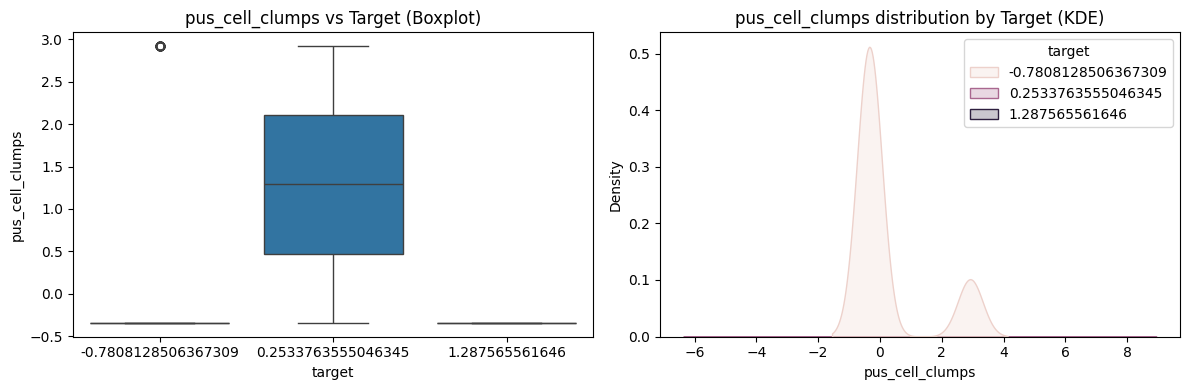

C:\Users\Disha\AppData\Local\Temp\ipykernel_24704\223497620.py:21: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.
  sns.kdeplot(data=df_numerical, x=col, hue='target', fill=True)


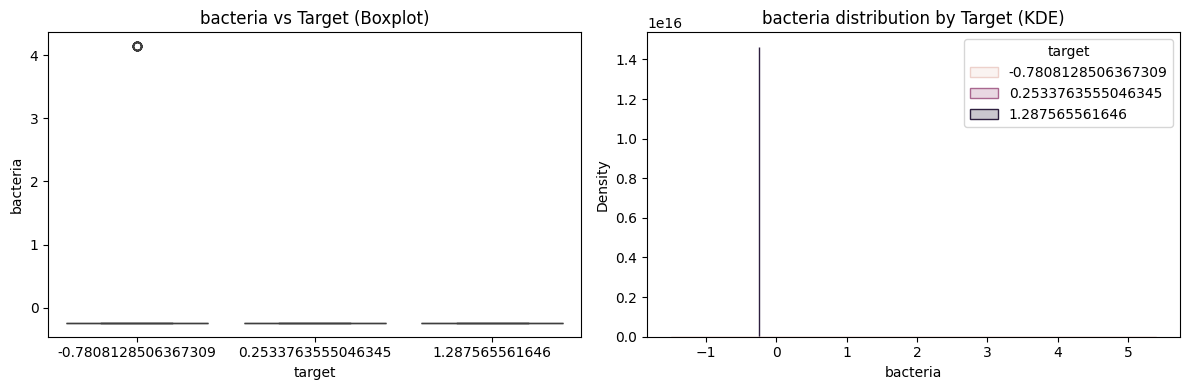

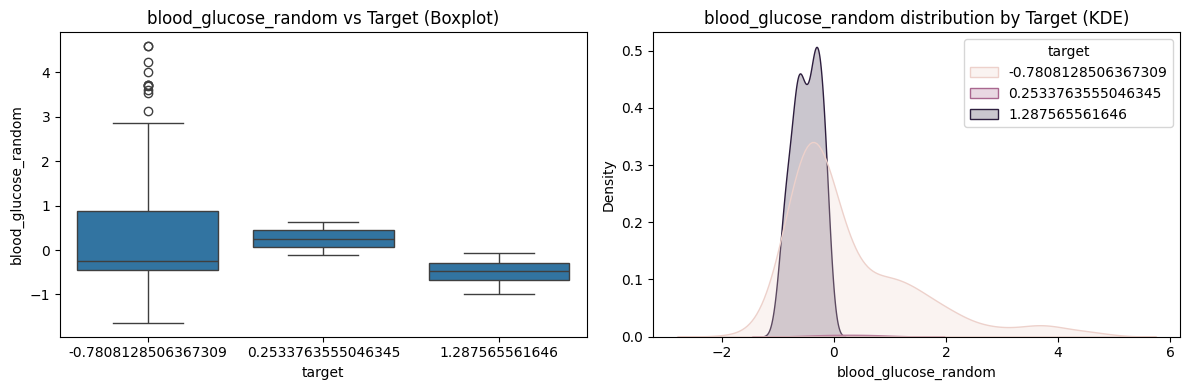

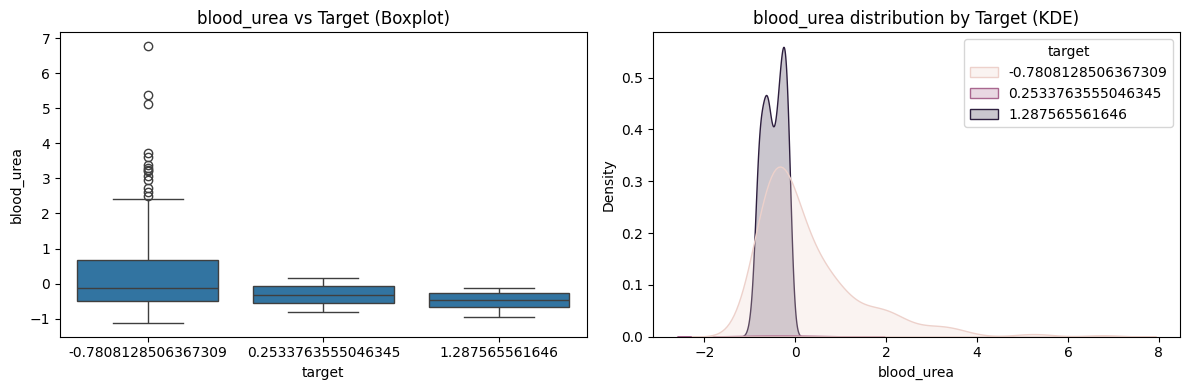

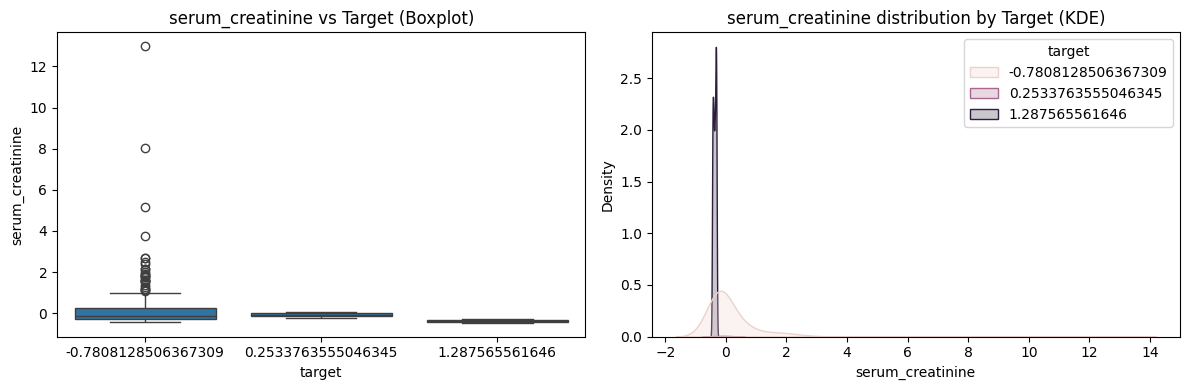

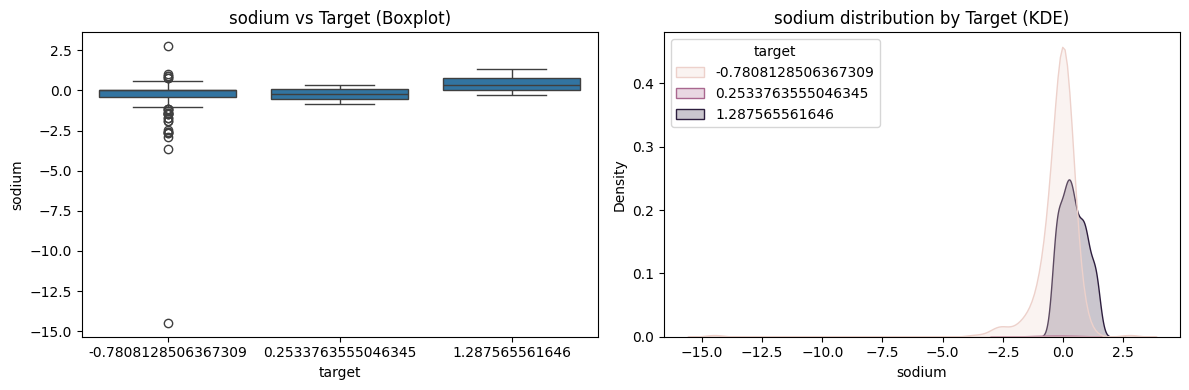

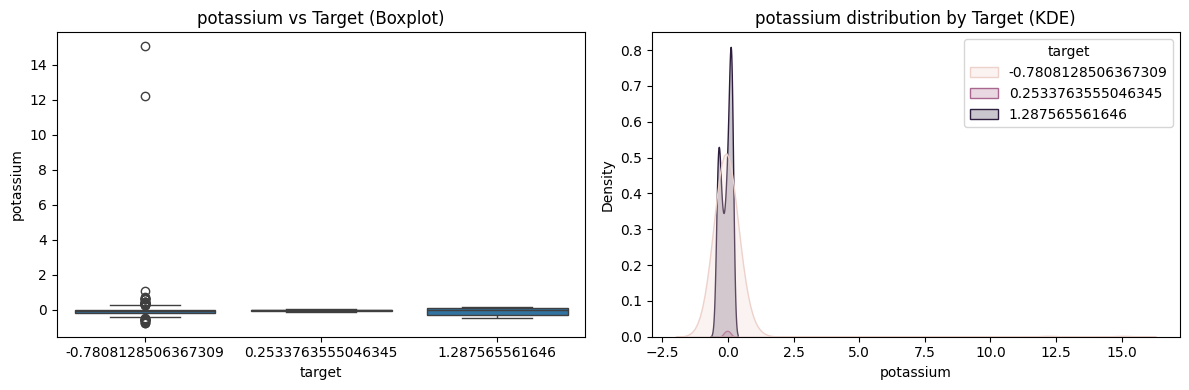

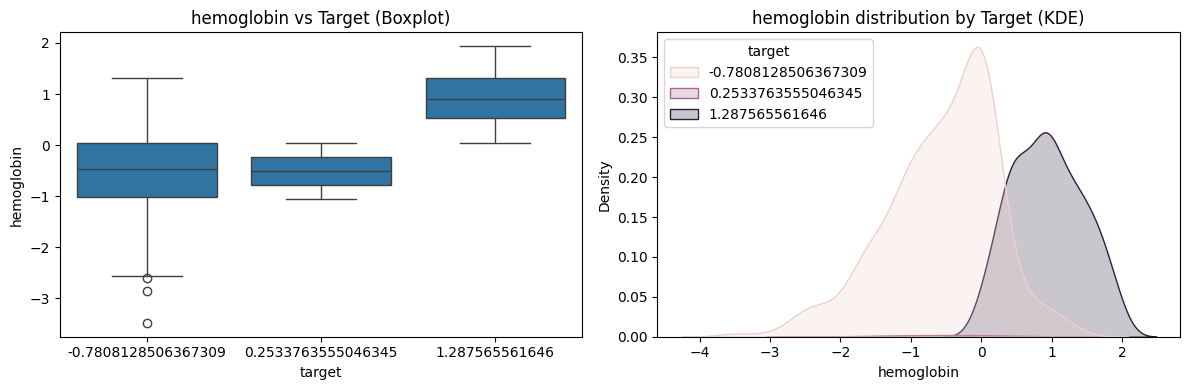

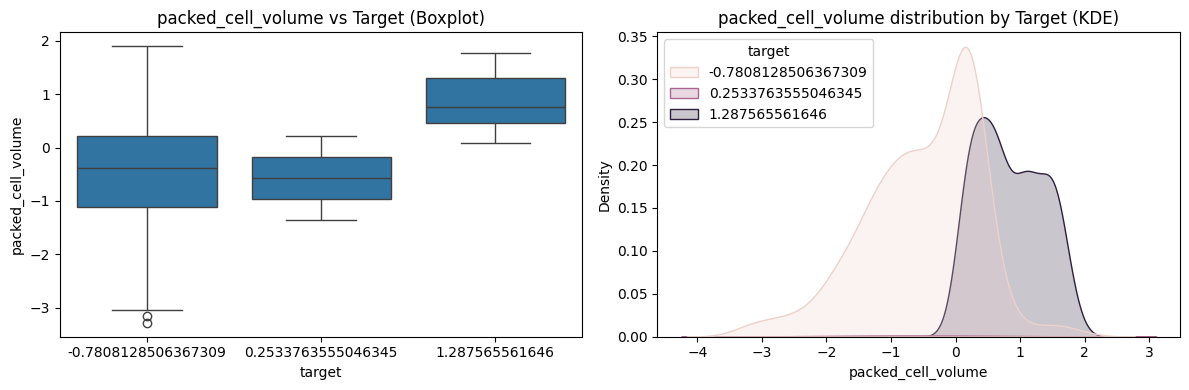

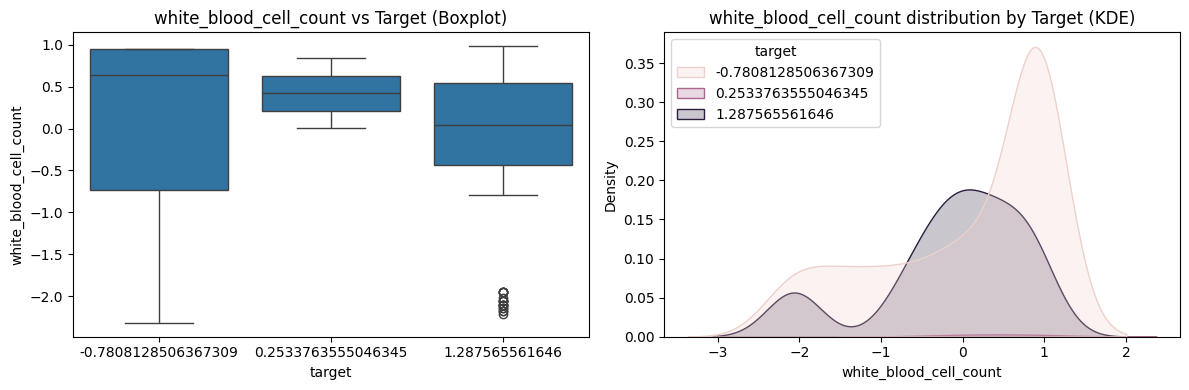

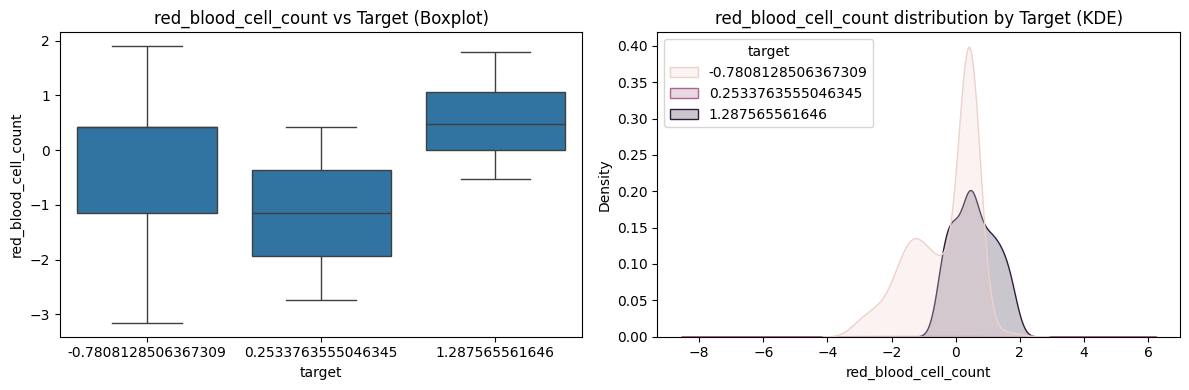

C:\Users\Disha\AppData\Local\Temp\ipykernel_24704\223497620.py:21: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.
  sns.kdeplot(data=df_numerical, x=col, hue='target', fill=True)


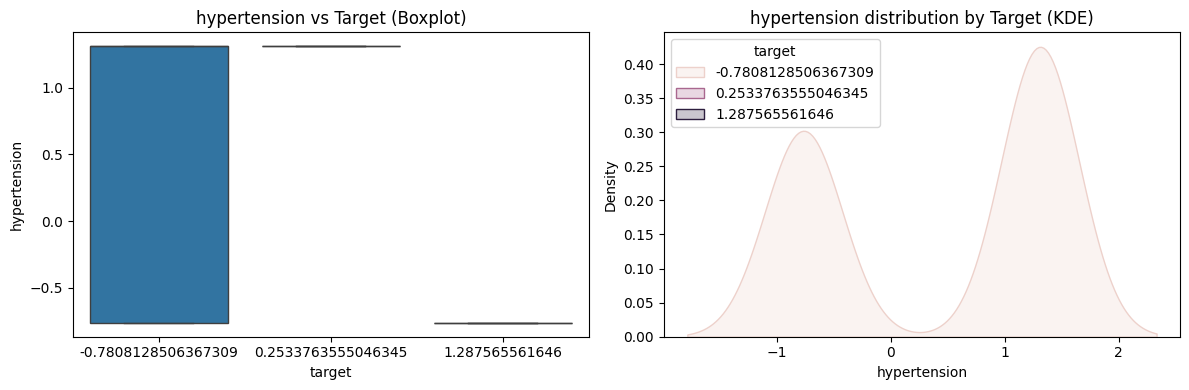

C:\Users\Disha\AppData\Local\Temp\ipykernel_24704\223497620.py:21: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.
  sns.kdeplot(data=df_numerical, x=col, hue='target', fill=True)


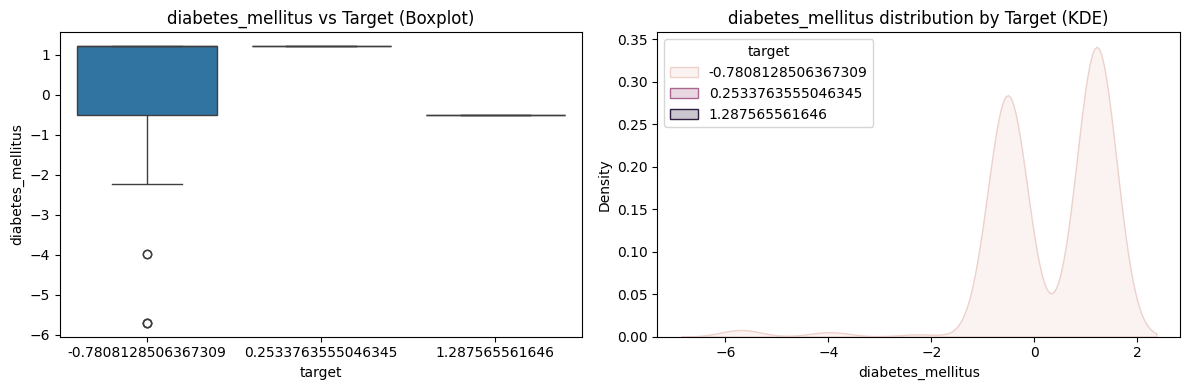

C:\Users\Disha\AppData\Local\Temp\ipykernel_24704\223497620.py:21: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.
  sns.kdeplot(data=df_numerical, x=col, hue='target', fill=True)


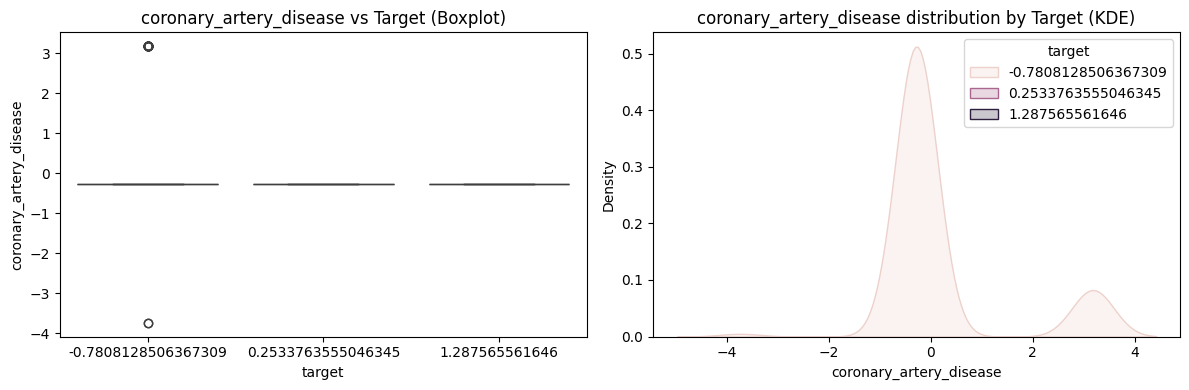

C:\Users\Disha\AppData\Local\Temp\ipykernel_24704\223497620.py:21: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.
  sns.kdeplot(data=df_numerical, x=col, hue='target', fill=True)


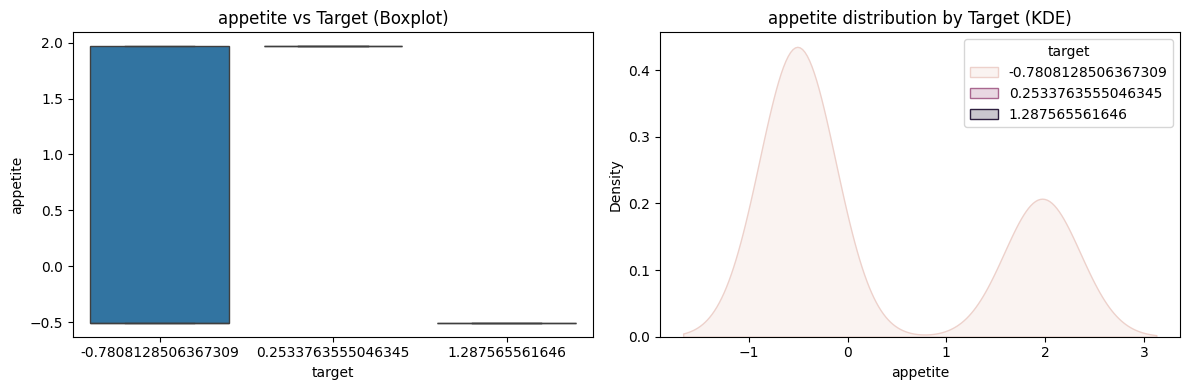

C:\Users\Disha\AppData\Local\Temp\ipykernel_24704\223497620.py:21: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.
  sns.kdeplot(data=df_numerical, x=col, hue='target', fill=True)


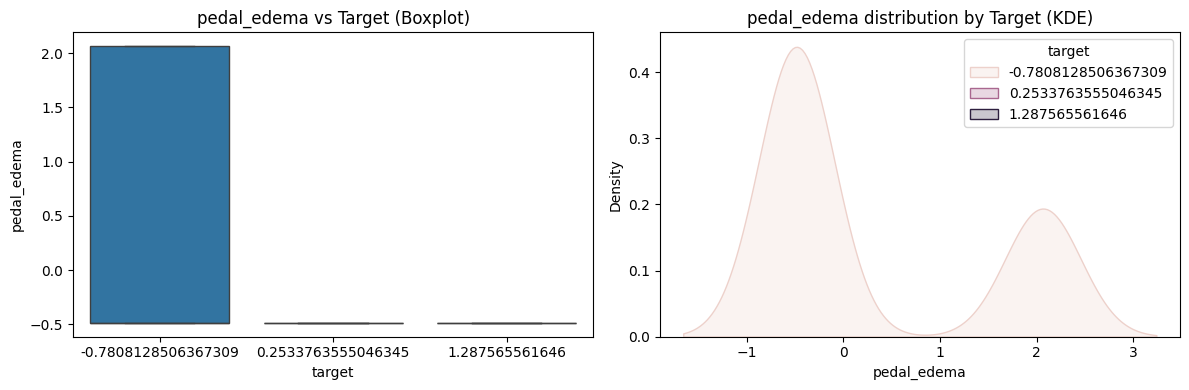

C:\Users\Disha\AppData\Local\Temp\ipykernel_24704\223497620.py:21: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.
  sns.kdeplot(data=df_numerical, x=col, hue='target', fill=True)


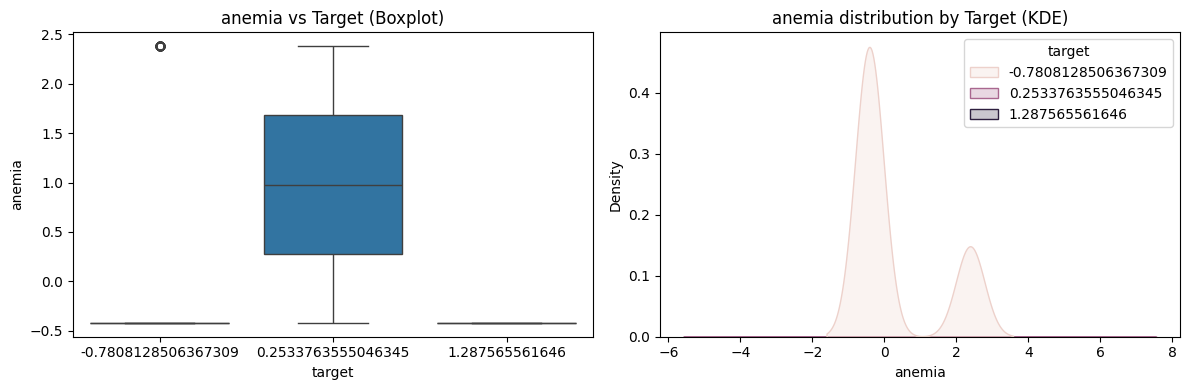

In [39]:
# Assume df_numerical has the encoded target (0 = notckd, 1 = ckd)
# We’ll use violinplots, boxplots, and kde plots

num_cols = df_numerical.select_dtypes(include=['int64', 'float64']).columns.tolist()

# Remove target temporarily
if 'target' in num_cols:
    num_cols.remove('target')

# Numerical features vs target (0 or 1)
for col in num_cols:
    plt.figure(figsize=(12, 4))

    # Boxplot
    plt.subplot(1, 2, 1)
    sns.boxplot(x='target', y=col, data=df_numerical)
    plt.title(f'{col} vs Target (Boxplot)')

    # KDE Plot
    plt.subplot(1, 2, 2)
    sns.kdeplot(data=df_numerical, x=col, hue='target', fill=True)
    plt.title(f'{col} distribution by Target (KDE)')

    plt.tight_layout()
    plt.show()


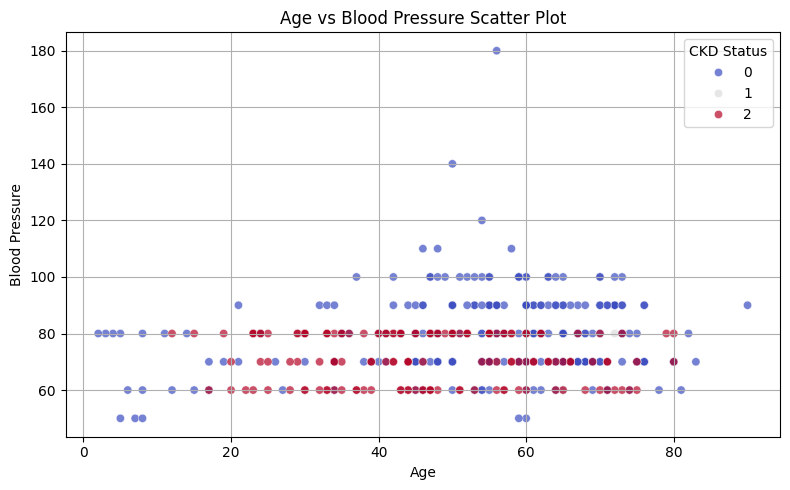

In [40]:
import matplotlib.pyplot as plt
import seaborn as sns

# Ensure columns are correctly named and numeric
# If not already renamed:
df.rename(columns={'bp': 'blood_pressure'}, inplace=True)

# Create scatter plot
plt.figure(figsize=(8, 5))
sns.scatterplot(data=df, x='age', y='blood_pressure', hue='target', palette='coolwarm', alpha=0.7)

plt.title('Age vs Blood Pressure Scatter Plot')
plt.xlabel('Age')
plt.ylabel('Blood Pressure')
plt.legend(title='CKD Status')
plt.grid(True)
plt.tight_layout()
plt.show()


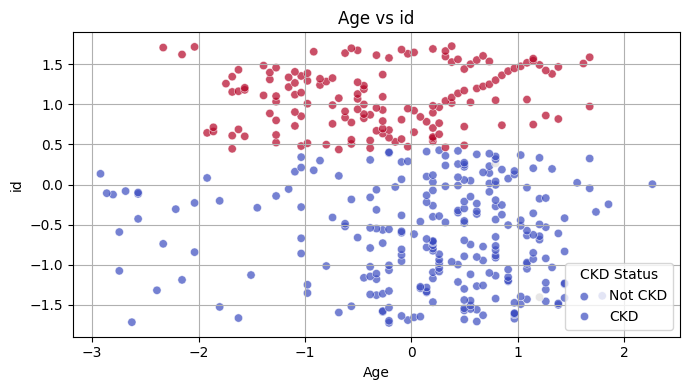

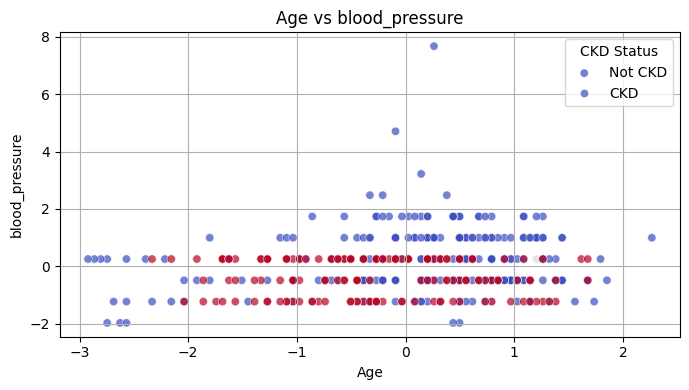

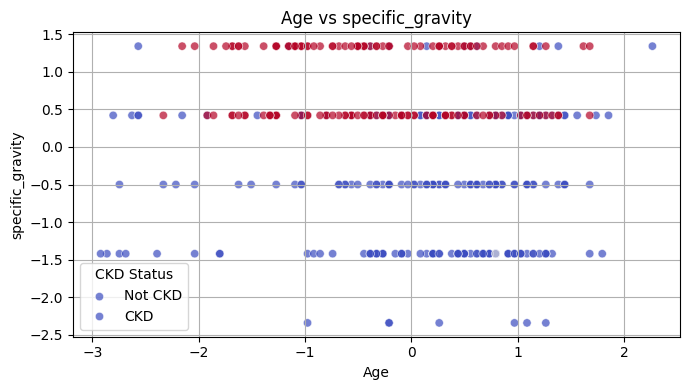

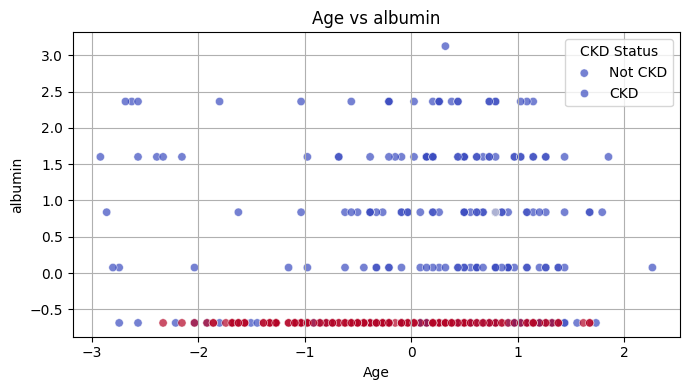

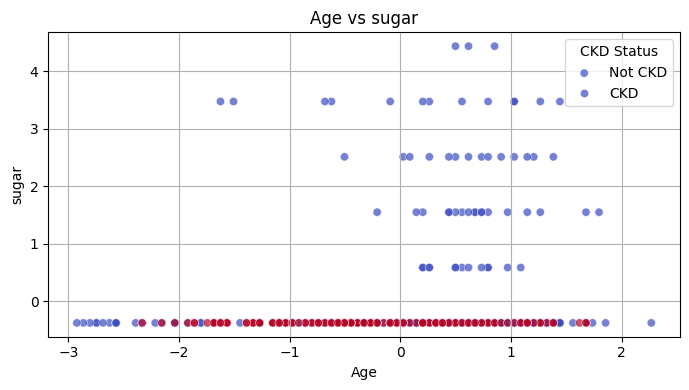

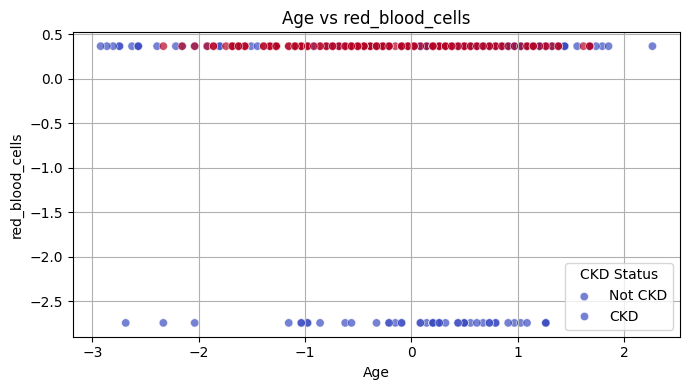

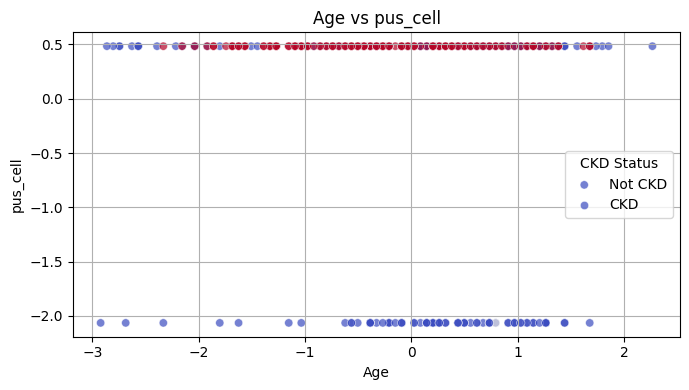

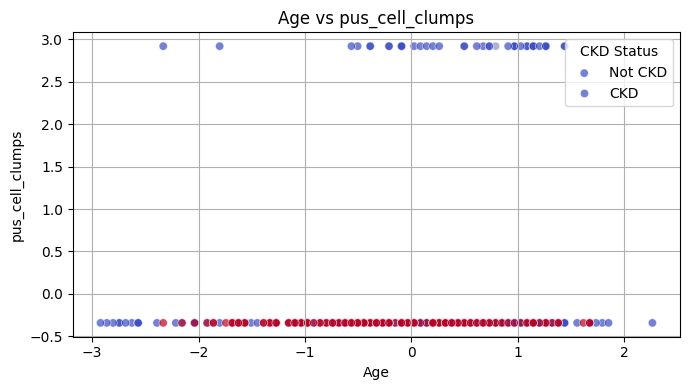

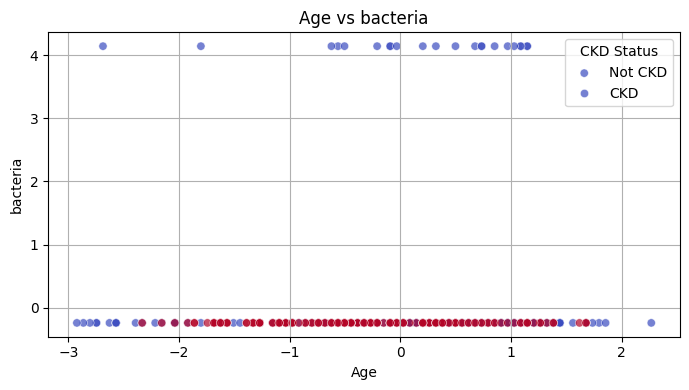

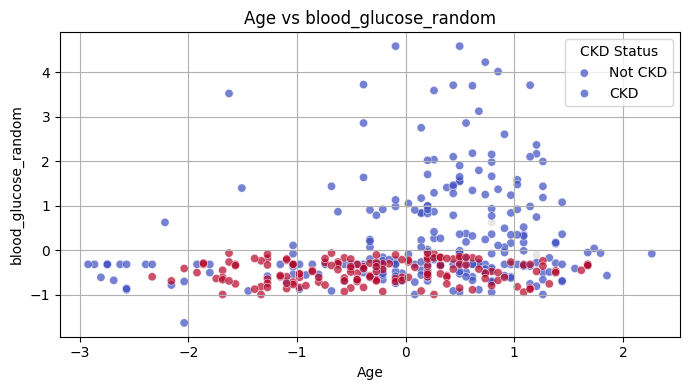

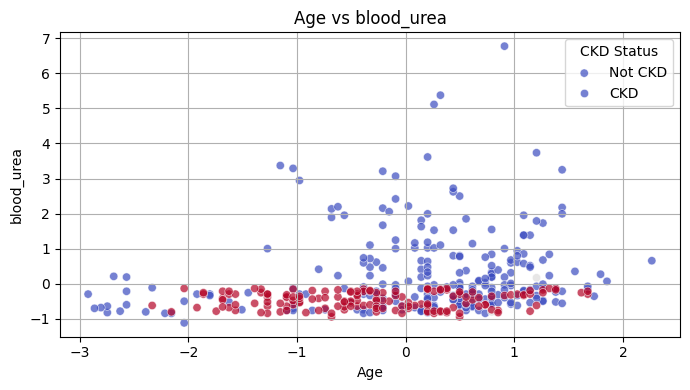

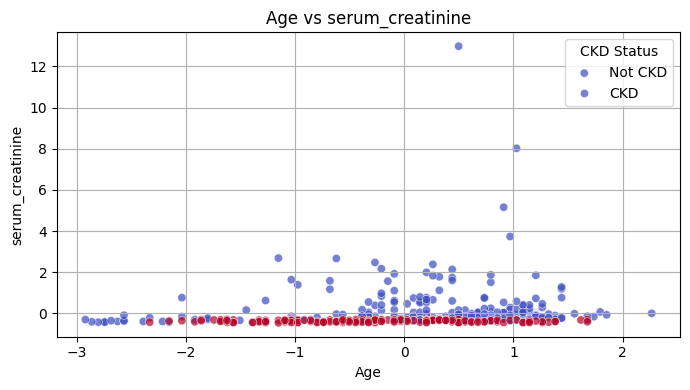

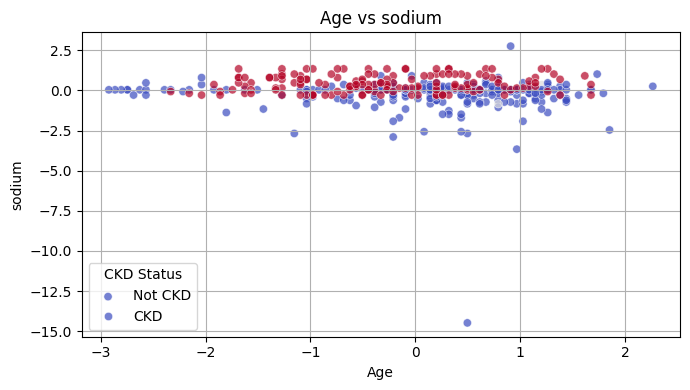

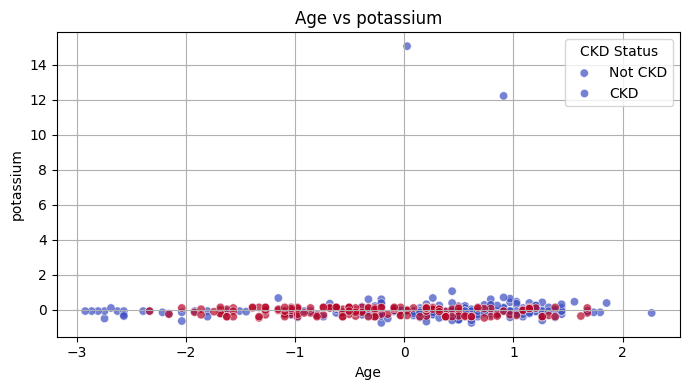

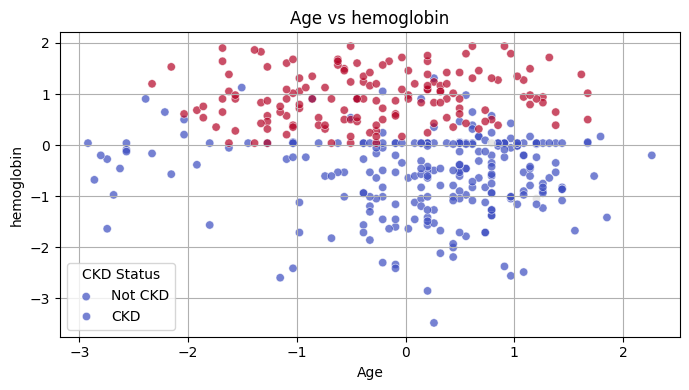

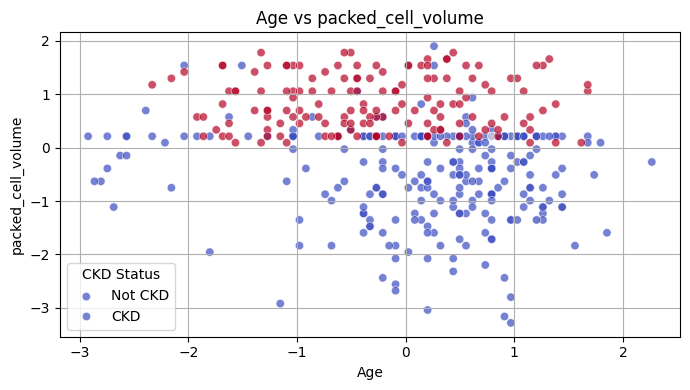

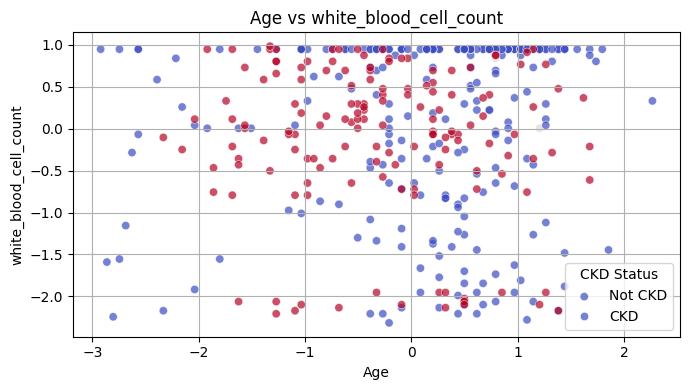

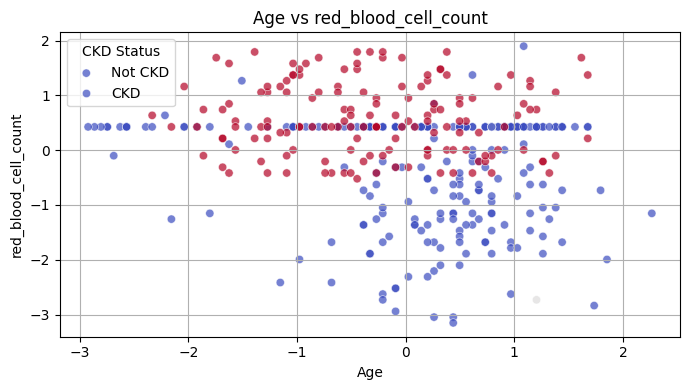

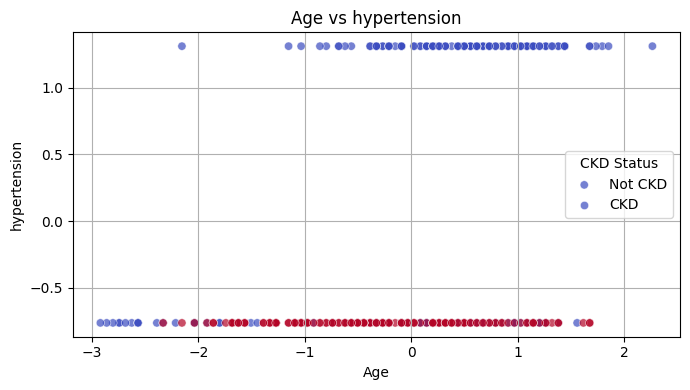

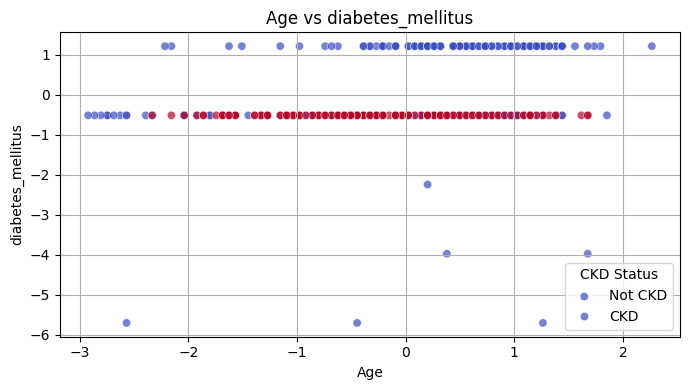

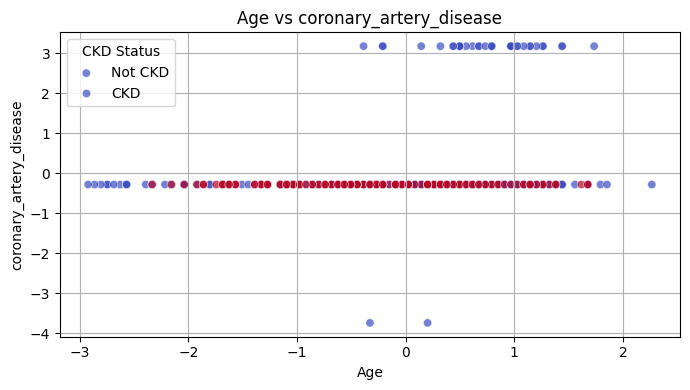

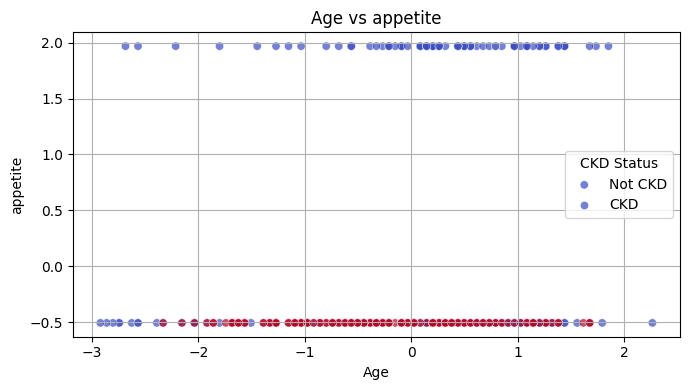

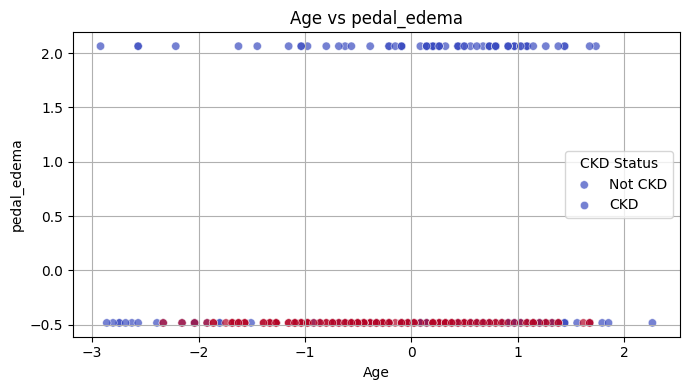

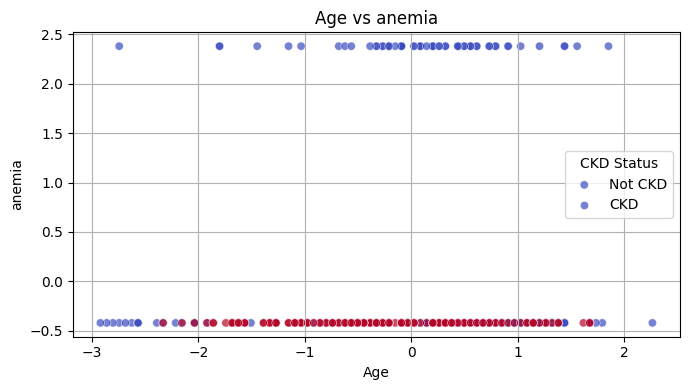

In [41]:
import matplotlib.pyplot as plt
import seaborn as sns

# Get all continuous numerical columns excluding 'age' and 'target'
continuous_cols = df_numerical.select_dtypes(include=['float64', 'int64']).columns.tolist()

if 'age' in continuous_cols:
    continuous_cols.remove('age')
if 'target' in continuous_cols:
    continuous_cols.remove('target')

# Multivariate scatter plots: age vs each continuous feature
for col in continuous_cols:
    plt.figure(figsize=(7, 4))
    sns.scatterplot(data=df_numerical, x='age', y=col, hue='target', palette='coolwarm', alpha=0.7)
    plt.title(f'Age vs {col}')
    plt.xlabel('Age')
    plt.ylabel(col)
    plt.legend(title='CKD Status', labels=['Not CKD', 'CKD'])
    plt.grid(True)
    plt.tight_layout()
    plt.show()


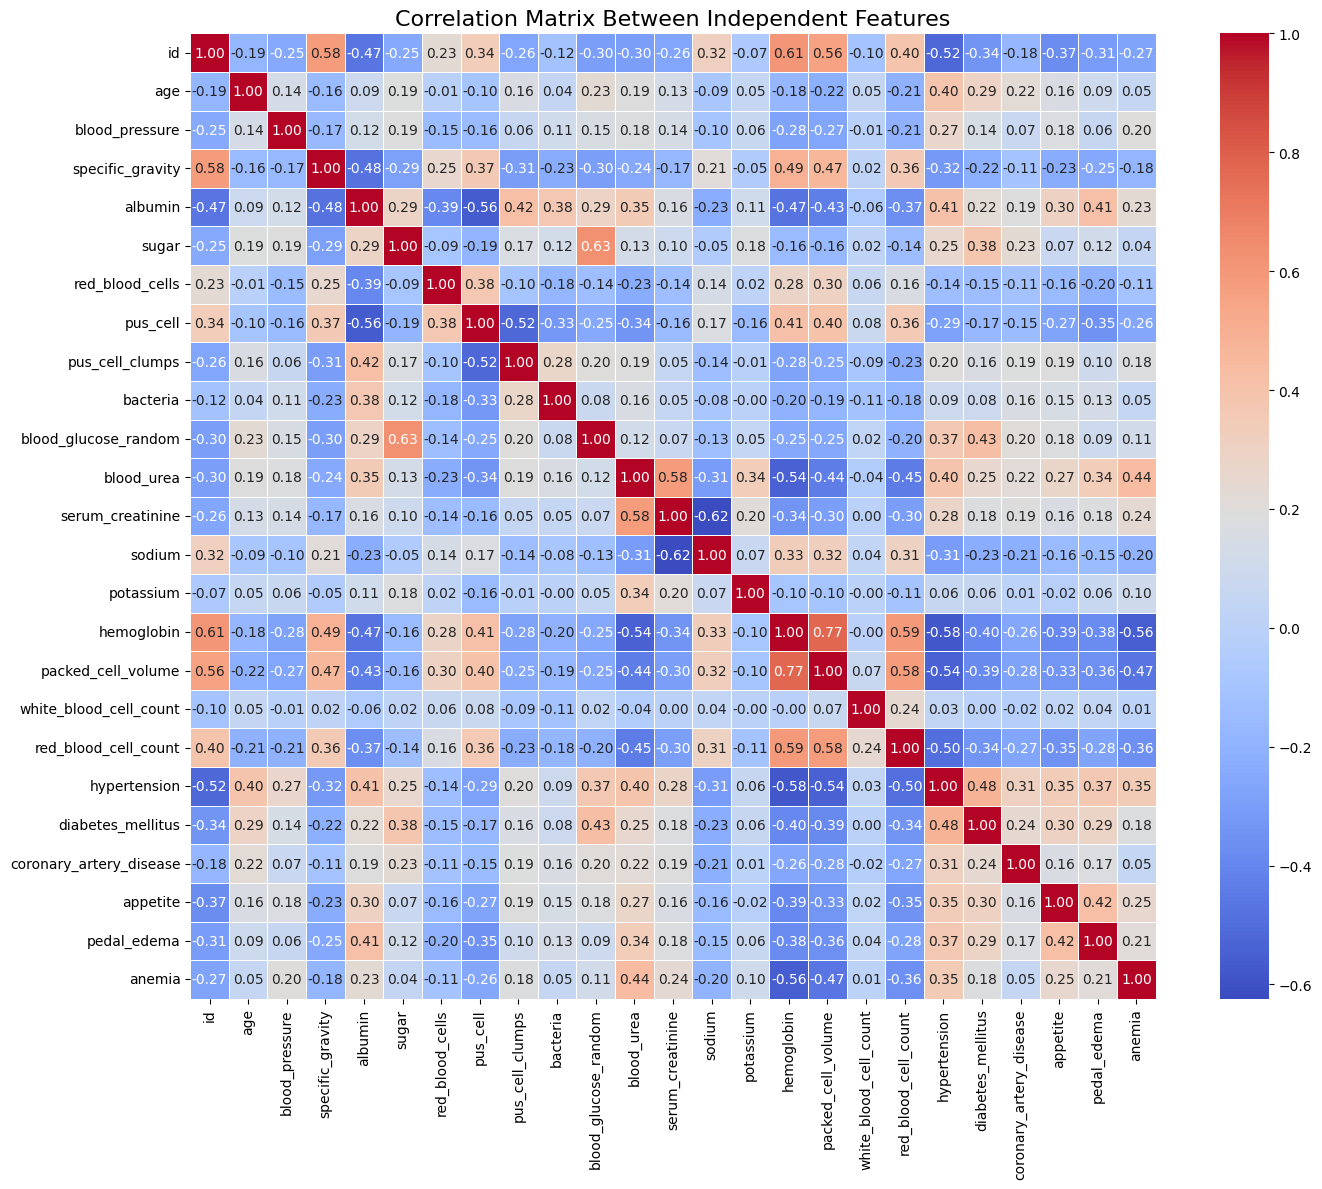

In [42]:
import seaborn as sns
import matplotlib.pyplot as plt

# Step 1: Drop target column to focus only on independent features
features_only = df_numerical.drop(columns=['target'])

# Step 2: Compute correlation matrix
correlation_matrix = features_only.corr()

# Step 3: Visualize using heatmap
plt.figure(figsize=(15, 12))
sns.heatmap(correlation_matrix, annot=True, fmt='.2f', cmap='coolwarm', square=True, linewidths=0.5)
plt.title('Correlation Matrix Between Independent Features', fontsize=16)
plt.tight_layout()
plt.show()


Target Class Distribution:
target
0    248
2    150
1      2
Name: count, dtype: int64


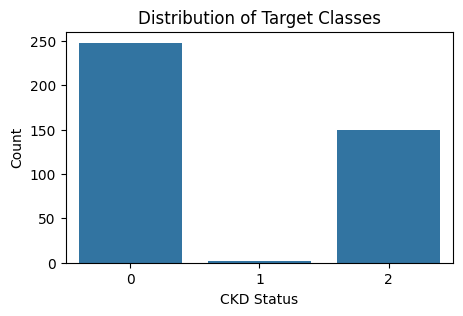

In [43]:
# Count target class values
print("Target Class Distribution:")
print(df['target'].value_counts())

# Plot count
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(5, 3))
sns.countplot(x='target', data=df)
plt.title('Distribution of Target Classes')
plt.xlabel('CKD Status')
plt.ylabel('Count')
plt.show()


Encoded Target Class Distribution:
target
-0.780813    248
 1.287566    150
 0.253376      2
Name: count, dtype: int64


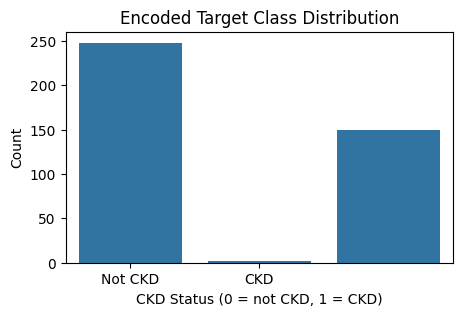

In [44]:
# Count encoded target values
print("Encoded Target Class Distribution:")
print(df_numerical['target'].value_counts())

# Plot
plt.figure(figsize=(5, 3))
sns.countplot(x='target', data=df_numerical)
plt.title('Encoded Target Class Distribution')
plt.xlabel('CKD Status (0 = not CKD, 1 = CKD)')
plt.ylabel('Count')
plt.xticks([0, 1], ['Not CKD', 'CKD'])
plt.show()


Target Class Counts:

target
0    248
2    150
1      2
Name: count, dtype: int64


C:\Users\Disha\AppData\Local\Temp\ipykernel_24704\1798359895.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x='target', palette='Set2')


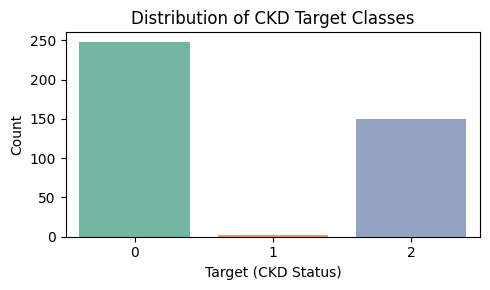

In [45]:
import seaborn as sns
import matplotlib.pyplot as plt

# Show the value counts
print("Target Class Counts:\n")
print(df['target'].value_counts())

# Seaborn countplot
plt.figure(figsize=(5, 3))
sns.countplot(data=df, x='target', palette='Set2')

plt.title('Distribution of CKD Target Classes')
plt.xlabel('Target (CKD Status)')
plt.ylabel('Count')
plt.tight_layout()
plt.show()


Encoded Target Class Counts:

target
-0.780813    248
 1.287566    150
 0.253376      2
Name: count, dtype: int64


C:\Users\Disha\AppData\Local\Temp\ipykernel_24704\3305625967.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df_numerical, x='target', palette='Set1')


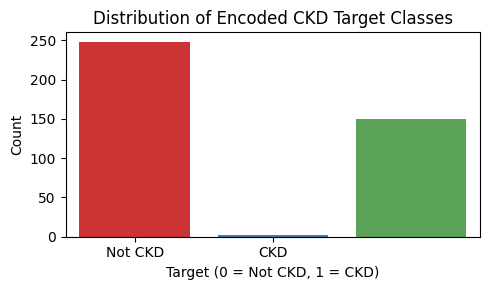

In [46]:
# Show the value counts
print("Encoded Target Class Counts:\n")
print(df_numerical['target'].value_counts())

# Seaborn countplot with custom labels
plt.figure(figsize=(5, 3))
sns.countplot(data=df_numerical, x='target', palette='Set1')

plt.title('Distribution of Encoded CKD Target Classes')
plt.xlabel('Target (0 = Not CKD, 1 = CKD)')
plt.ylabel('Count')
plt.xticks([0, 1], ['Not CKD', 'CKD'])
plt.tight_layout()
plt.show()


In [47]:
from sklearn.preprocessing import StandardScaler

# Select only features (drop target column)
X = df_numerical.drop('target', axis=1)

# Initialize scaler
scaler = StandardScaler()

# Fit and transform
X_scaled = scaler.fit_transform(X)

# Convert back to DataFrame for convenience
X_scaled_df = pd.DataFrame(X_scaled, columns=X.columns)

# Add target column back
X_scaled_df['target'] = df_numerical['target'].values

# Show the first few rows
X_scaled_df.head()


id       age  blood_pressure  specific_gravity   albumin     sugar  \
0 -1.727726 -0.210031        0.254214          0.421486  0.076249 -0.380269   
1 -1.719066 -2.627234       -1.972476          0.421486  2.363728 -0.380269   
2 -1.710406  0.615355        0.254214         -1.421074  0.838742  2.507853   
3 -1.701745 -0.210031       -0.488016         -2.342354  2.363728 -0.380269   
4 -1.693085 -0.033163        0.254214         -1.421074  0.838742 -0.380269   

   red_blood_cells  pus_cell  pus_cell_clumps  bacteria  ...  \
0          0.36489  0.484322        -0.342518 -0.241249  ...   
1          0.36489  0.484322        -0.342518 -0.241249  ...   
2          0.36489  0.484322        -0.342518 -0.241249  ...   
3          0.36489 -2.064742         2.919556 -0.241249  ...   
4          0.36489  0.484322        -0.342518 -0.241249  ...   

   packed_cell_volume  white_blood_cell_count  red_blood_cell_count  \
0            0.575394                0.293204              0.424844   
1           -0.147993               -0.286322              0.424844   
2           -0.991944                0.220763              0.424844   
3           -0.871379               -0.069000             -1.153525   
4           -0.509686                0.148322             -0.311728   

   hypertension  diabetes_mellitus  coronary_artery_disease  appetite  \
0      1.311903           1.209416                -0.276686 -0.507801   
1     -0.762252          -0.518321                -0.276686 -0.507801   
2     -0.762252           1.209416                -0.276686  1.969276   
3      1.311903          -0.518321                -0.276686  1.969276   
4     -0.762252          -0.518321                -0.276686 -0.507801   

   pedal_edema    anemia    target  
0    -0.484322 -0.420084 -0.780813  
1    -0.484322 -0.420084 -0.780813  
2    -0.484322  2.380476 -0.780813  
3     2.064742  2.380476 -0.780813  
4    -0.484322 -0.420084 -0.780813  

[5 rows x 26 columns]

In [48]:
# Independent variables (features)
X = X_scaled_df.drop('target', axis=1)

# Dependent variable (target)
y = X_scaled_df['target']

# Show the shapes to confirm
print("Shape of X (features):", X.shape)
print("Shape of y (target):", y.shape)


Shape of X (features): (400, 25)
Shape of y (target): (400,)


In [49]:
from sklearn.model_selection import train_test_split

# 80% training, 20% testing split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

# Confirm the sizes
print("X_train shape:", X_train.shape)
print("X_test shape:", X_test.shape)
print("y_train shape:", y_train.shape)
print("y_test shape:", y_test.shape)


X_train shape: (320, 25)
X_test shape: (80, 25)
y_train shape: (320,)
y_test shape: (80,)


In [51]:
import pandas as pd

# Load the dataset
df = pd.read_csv('../dataset/kidney_disease.csv')  # Use your cleaned CSV file here

# Display the first few rows
print("First 5 rows:")
print(df.head())

# Show dataset information
print("\nDataset Info:")
print(df.info())

# Show the number of unique values per column
print("\nUnique values in each column:")
print(df.nunique())

# Check for missing values
print("\nMissing values in each column:")
print(df.isnull().sum())

# Show statistical summary
print("\nStatistical Summary:")
print(df.describe(include='all'))

# Count target classes (replace 'classification' with your target column name if different)
print("\nTarget class distribution:")
print(df['classification'].value_counts())


First 5 rows:
   id   age    bp     sg   al   su     rbc        pc         pcc          ba  \
0   0  48.0  80.0  1.020  1.0  0.0     NaN    normal  notpresent  notpresent   
1   1   7.0  50.0  1.020  4.0  0.0     NaN    normal  notpresent  notpresent   
2   2  62.0  80.0  1.010  2.0  3.0  normal    normal  notpresent  notpresent   
3   3  48.0  70.0  1.005  4.0  0.0  normal  abnormal     present  notpresent   
4   4  51.0  80.0  1.010  2.0  0.0  normal    normal  notpresent  notpresent   

   ...  pcv    wc   rc  htn   dm  cad appet   pe  ane classification  
0  ...   44  7800  5.2  yes  yes   no  good   no   no            ckd  
1  ...   38  6000  NaN   no   no   no  good   no   no            ckd  
2  ...   31  7500  NaN   no  yes   no  poor   no  yes            ckd  
3  ...   32  6700  3.9  yes   no   no  poor  yes  yes            ckd  
4  ...   35  7300  4.6   no   no   no  good   no   no            ckd  

[5 rows x 26 columns]

Dataset Info:
<class 'pandas.core.frame.DataFrame'>
Ran

In [52]:
# Check for NaNs in target
print("NaNs in y_train:", y_train.isna().sum())
print("NaNs in y_test:", y_test.isna().sum())

# Drop rows with NaNs if any (optional safety)
X_train = X_train[~y_train.isna()]
y_train = y_train.dropna()

X_test = X_test[~y_test.isna()]
y_test = y_test.dropna()

# Convert target to integer (if not already)
y_train = y_train.astype(int)
y_test = y_test.astype(int)


NaNs in y_train: 0
NaNs in y_test: 0


In [53]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from sklearn.metrics import accuracy_score, classification_report

# Define model architecture
model = Sequential()
model.add(Dense(32, input_dim=X_train.shape[1], activation='relu'))
model.add(Dense(16, activation='relu'))
model.add(Dense(1, activation='sigmoid'))  # Sigmoid for binary classification

# Compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Train the model
model.fit(X_train, y_train, epochs=100, batch_size=32, verbose=1)

# Predict on test data
y_pred_prob = model.predict(X_test)
y_pred = (y_pred_prob > 0.5).astype(int).reshape(-1)

# Evaluate performance
test_acc = accuracy_score(y_test, y_pred)
print("✅ Test Accuracy:", test_acc)
print("\n📊 Classification Report:\n", classification_report(y_test, y_pred))


Epoch 1/100


C:\Users\Disha\AppData\Roaming\Python\Python312\site-packages\keras\src\layers\core\dense.py:92: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


10/10 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.4250 - loss: 0.9379  
Epoch 2/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.5281 - loss: 0.7410 
Epoch 3/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.6906 - loss: 0.6026 
Epoch 4/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8094 - loss: 0.4954 
Epoch 5/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.8875 - loss: 0.4050 
Epoch 6/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9344 - loss: 0.3261 
Epoch 7/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9625 - loss: 0.2599 
Epoch 8/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9719 - loss: 0.2059 
Epoch 9/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9750 - loss: 0.1648 
Epoch 10/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.9844 - loss: 0.1335 
Epoch 11/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9875 - loss: 0.1101 
Epoch 12/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy:

NameError: name 'history' is not defined

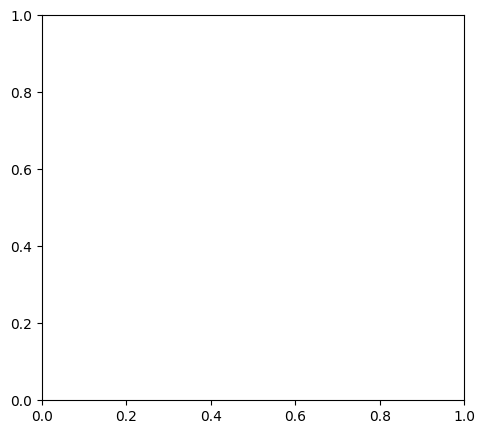

In [54]:
import matplotlib.pyplot as plt

# Plot training & validation accuracy
plt.figure(figsize=(12, 5))

# Accuracy plot
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

# Loss plot
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.tight_layout()
plt.show()


✅ Test Accuracy (Random Forest): 0.9875

📊 Classification Report:
              precision    recall  f1-score   support

           0       0.98      1.00      0.99        50
           1       1.00      0.97      0.98        30

    accuracy                           0.99        80
   macro avg       0.99      0.98      0.99        80
weighted avg       0.99      0.99      0.99        80



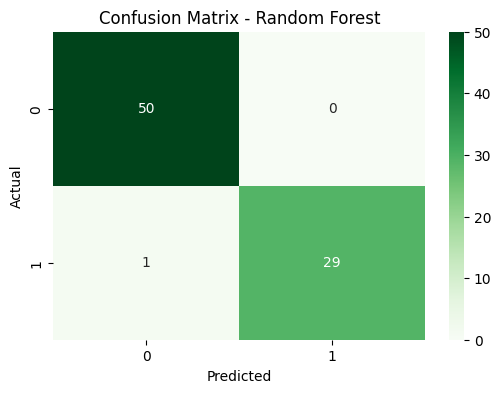

In [55]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

# ✅ Step 1: Initialize the model
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)

# ✅ Step 2: Train the model
rf_model.fit(X_train, y_train)

# ✅ Step 3: Make predictions
y_pred_rf = rf_model.predict(X_test)

# ✅ Step 4: Evaluate the model
accuracy_rf = accuracy_score(y_test, y_pred_rf)
print(f"✅ Test Accuracy (Random Forest): {accuracy_rf:.4f}")

print("\n📊 Classification Report:")
print(classification_report(y_test, y_pred_rf))

# ✅ Step 5: Confusion Matrix
cm = confusion_matrix(y_test, y_pred_rf)
plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Greens')
plt.title("Confusion Matrix - Random Forest")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()


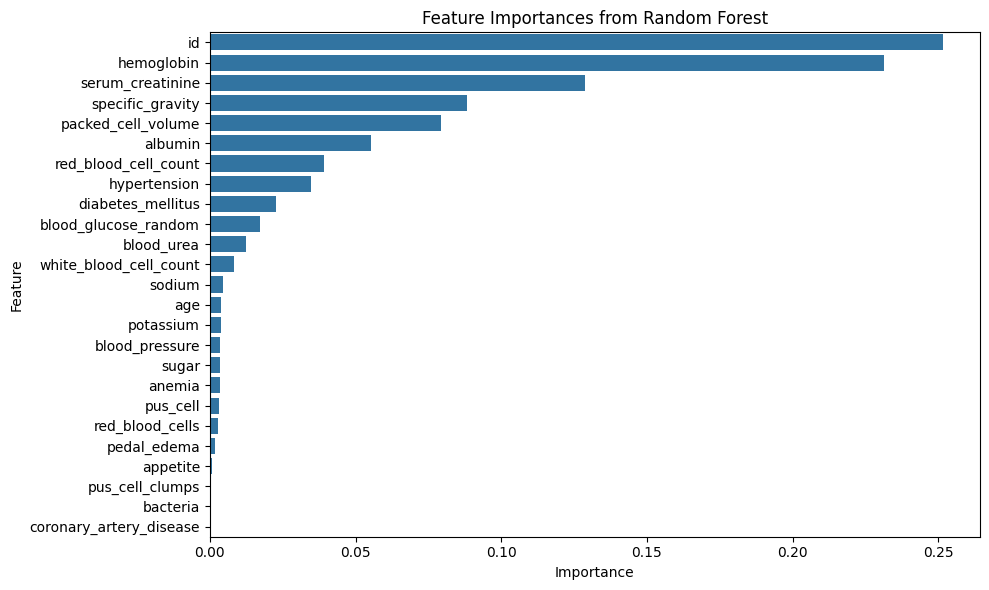

In [56]:
import pandas as pd
import numpy as np

# Assuming you have feature names in a list called feature_names
feature_names = X_train.columns
feature_importances = rf_model.feature_importances_
features_df = pd.DataFrame({'Feature': feature_names, 'Importance': feature_importances})
features_df = features_df.sort_values(by='Importance', ascending=False)

plt.figure(figsize=(10, 6))
sns.barplot(data=features_df, x='Importance', y='Feature')
plt.title("Feature Importances from Random Forest")
plt.tight_layout()
plt.show()


✅ Test Accuracy (Decision Tree): 1.0000

📊 Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        50
           1       1.00      1.00      1.00        30

    accuracy                           1.00        80
   macro avg       1.00      1.00      1.00        80
weighted avg       1.00      1.00      1.00        80



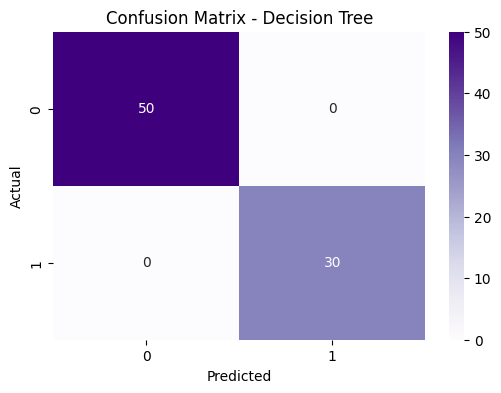

In [58]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

# ✅ Step 1: Initialize the Decision Tree model
dt_model = DecisionTreeClassifier(random_state=42)

# ✅ Step 2: Train the model
dt_model.fit(X_train, y_train)

# ✅ Step 3: Predict on test data
y_pred_dt = dt_model.predict(X_test)

# ✅ Step 4: Evaluate the model
accuracy_dt = accuracy_score(y_test, y_pred_dt)
print(f"✅ Test Accuracy (Decision Tree): {accuracy_dt:.4f}")

print("\n📊 Classification Report:")
print(classification_report(y_test, y_pred_dt))

# ✅ Step 5: Confusion Matrix
cm = confusion_matrix(y_test, y_pred_dt)
plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Purples')
plt.title("Confusion Matrix - Decision Tree")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()


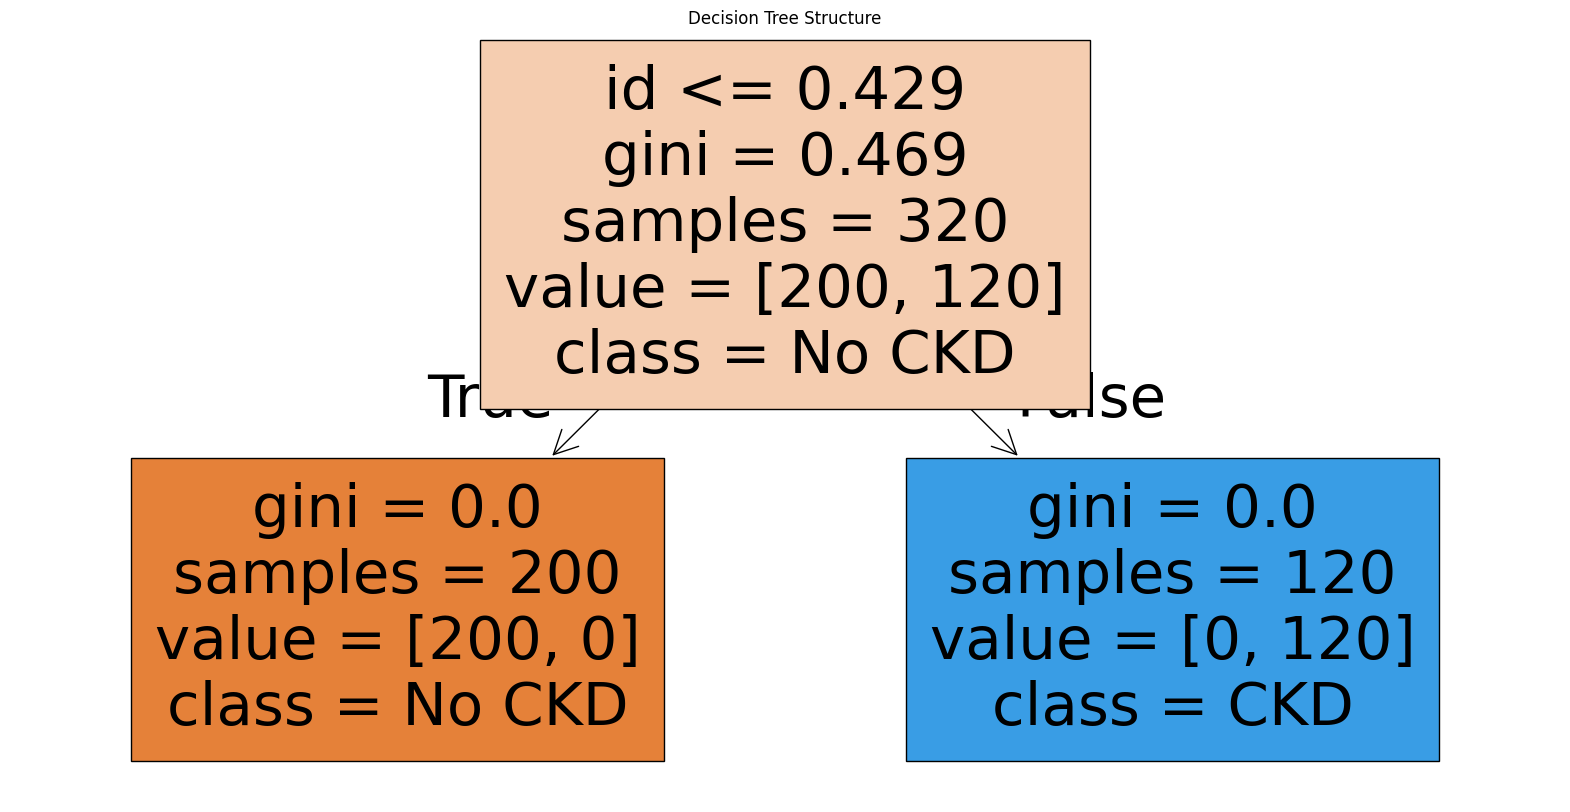

In [59]:
from sklearn.tree import plot_tree

plt.figure(figsize=(20, 10))
plot_tree(dt_model, feature_names=X_train.columns, class_names=['No CKD', 'CKD'], filled=True)
plt.title("Decision Tree Structure")
plt.show()


✅ Test Accuracy (Logistic Regression): 1.0000

📊 Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        50
           1       1.00      1.00      1.00        30

    accuracy                           1.00        80
   macro avg       1.00      1.00      1.00        80
weighted avg       1.00      1.00      1.00        80



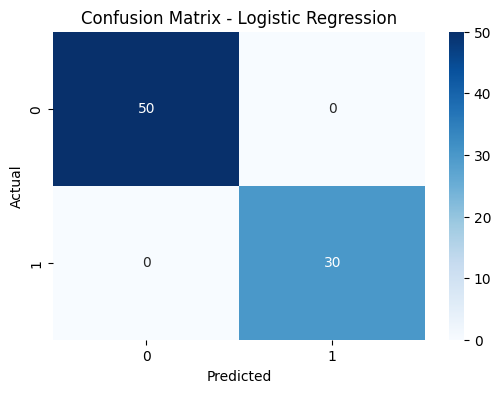

In [60]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

# ✅ Step 1: Initialize the Logistic Regression model
lr_model = LogisticRegression(max_iter=1000, random_state=42)

# ✅ Step 2: Train the model
lr_model.fit(X_train, y_train)

# ✅ Step 3: Predict on test data
y_pred_lr = lr_model.predict(X_test)

# ✅ Step 4: Evaluate the model
accuracy_lr = accuracy_score(y_test, y_pred_lr)
print(f"✅ Test Accuracy (Logistic Regression): {accuracy_lr:.4f}")

print("\n📊 Classification Report:")
print(classification_report(y_test, y_pred_lr))

# ✅ Step 5: Confusion Matrix
cm = confusion_matrix(y_test, y_pred_lr)
plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title("Confusion Matrix - Logistic Regression")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()


In [61]:
from keras.models import Sequential
from keras.layers import Dense
from sklearn.metrics import accuracy_score, classification_report

# Define ANN model
ann_model = Sequential([
    Dense(32, input_dim=X_train.shape[1], activation='relu'),
    Dense(16, activation='relu'),
    Dense(1, activation='sigmoid')
])

# Compile
ann_model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Train
history_ann = ann_model.fit(X_train, y_train, epochs=100, batch_size=16, validation_split=0.2, verbose=0)

# Predict
y_pred_ann = (ann_model.predict(X_test) > 0.5).astype("int32")

# Evaluate
acc_ann = accuracy_score(y_test, y_pred_ann)
print(f"\n✅ ANN Test Accuracy: {acc_ann:.4f}")
print("📊 Classification Report (ANN):")
print(classification_report(y_test, y_pred_ann))


C:\Users\Disha\AppData\Roaming\Python\Python312\site-packages\keras\src\layers\core\dense.py:92: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step

✅ ANN Test Accuracy: 1.0000
📊 Classification Report (ANN):
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        50
           1       1.00      1.00      1.00        30

    accuracy                           1.00        80
   macro avg       1.00      1.00      1.00        80
weighted avg       1.00      1.00      1.00        80



In [62]:
from sklearn.ensemble import RandomForestClassifier

rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)
y_pred_rf = rf_model.predict(X_test)

acc_rf = accuracy_score(y_test, y_pred_rf)
print(f"\n✅ Random Forest Test Accuracy: {acc_rf:.4f}")
print("📊 Classification Report (Random Forest):")
print(classification_report(y_test, y_pred_rf))



✅ Random Forest Test Accuracy: 0.9875
📊 Classification Report (Random Forest):
              precision    recall  f1-score   support

           0       0.98      1.00      0.99        50
           1       1.00      0.97      0.98        30

    accuracy                           0.99        80
   macro avg       0.99      0.98      0.99        80
weighted avg       0.99      0.99      0.99        80



In [63]:
from sklearn.tree import DecisionTreeClassifier

dt_model = DecisionTreeClassifier(random_state=42)
dt_model.fit(X_train, y_train)
y_pred_dt = dt_model.predict(X_test)

acc_dt = accuracy_score(y_test, y_pred_dt)
print(f"\n✅ Decision Tree Test Accuracy: {acc_dt:.4f}")
print("📊 Classification Report (Decision Tree):")
print(classification_report(y_test, y_pred_dt))



✅ Decision Tree Test Accuracy: 1.0000
📊 Classification Report (Decision Tree):
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        50
           1       1.00      1.00      1.00        30

    accuracy                           1.00        80
   macro avg       1.00      1.00      1.00        80
weighted avg       1.00      1.00      1.00        80



In [64]:
from sklearn.linear_model import LogisticRegression

lr_model = LogisticRegression(max_iter=1000, random_state=42)
lr_model.fit(X_train, y_train)
y_pred_lr = lr_model.predict(X_test)

acc_lr = accuracy_score(y_test, y_pred_lr)
print(f"\n✅ Logistic Regression Test Accuracy: {acc_lr:.4f}")
print("📊 Classification Report (Logistic Regression):")
print(classification_report(y_test, y_pred_lr))



✅ Logistic Regression Test Accuracy: 1.0000
📊 Classification Report (Logistic Regression):
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        50
           1       1.00      1.00      1.00        30

    accuracy                           1.00        80
   macro avg       1.00      1.00      1.00        80
weighted avg       1.00      1.00      1.00        80



In [66]:
print("\n🔍 Final Accuracy Summary:")
print(f"ANN Accuracy:              {acc_ann:.4f}")
print(f"Random Forest Accuracy:    {acc_rf:.4f}")
print(f"Decision Tree Accuracy:    {acc_dt:.4f}")
print(f"Logistic Regression:       {acc_lr:.4f}")



🔍 Final Accuracy Summary:
ANN Accuracy:              1.0000
Random Forest Accuracy:    0.9875
Decision Tree Accuracy:    1.0000
Logistic Regression:       1.0000


In [67]:
# Example sample input (change values as needed to match your dataset features)
sample = np.array([[55, 80, 1.020, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 140, 5.2, 44, 15.4, 38]])  # Example with 25 values


# ⚠️ Scale the sample just like the training data
sample_scaled = scaler.transform(sample)

# Predict using ANN model
ann_pred = ann_model.predict(sample_scaled)
ann_pred_label = int(ann_pred[0][0] > 0.5)  # Convert probability to 0 or 1

# Predict using Random Forest
rf_pred = rf_model.predict(sample_scaled)[0]

# Predict using Decision Tree
dt_pred = dt_model.predict(sample_scaled)[0]

# Predict using Logistic Regression
lr_pred = lr_model.predict(sample_scaled)[0]

# Interpret predictions
def interpret(pred):
    return "CKD Detected ✅" if pred == 1 else "No CKD ❌"

# Display all predictions
print("🔮 ANN Model Prediction:", interpret(ann_pred_label))
print("🌲 Random Forest Prediction:", interpret(rf_pred))
print("🌳 Decision Tree Prediction:", interpret(dt_pred))
print("📈 Logistic Regression Prediction:", interpret(lr_pred))


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step
🔮 ANN Model Prediction: No CKD ❌
🌲 Random Forest Prediction: No CKD ❌
🌳 Decision Tree Prediction: CKD Detected ✅
📈 Logistic Regression Prediction: CKD Detected ✅


C:\Users\Disha\AppData\Roaming\Python\Python312\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
C:\Users\Disha\AppData\Roaming\Python\Python312\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(
C:\Users\Disha\AppData\Roaming\Python\Python312\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(
C:\Users\Disha\AppData\Roaming\Python\Python312\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


In [68]:
import pandas as pd

# ✅ Sample input (replace values with actual or meaningful CKD-positive values)
sample_data = {
    'age': 60,
    'bp': 80,
    'sg': 1.010,
    'al': 3,
    'su': 0,
    'rbc': 1,
    'pc': 1,
    'pcc': 1,
    'ba': 0,
    'bgr': 400,
    'bu': 60,
    'sc': 5.0,
    'sod': 130,
    'pot': 4.5,
    'hemo': 9.0,
    'pcv': 30,
    'wc': 10000,
    'rc': 4.5,
    'htn': 1,
    'dm': 1,
    'cad': 0,
    'appet': 1,
    'pe': 1,
    'ane': 1
}

# Convert to DataFrame
sample_df = pd.DataFrame([sample_data])

sample_scaled = scaler.transform(sample_df)

# ANN
ann_pred = ann_model.predict(sample_scaled)
ann_label = 'CKD' if ann_pred[0][0] > 0.5 else 'No CKD'
print("ANN Prediction:", ann_label)

# Random Forest
rf_pred = rf_model.predict(sample_scaled)
print("Random Forest Prediction:", 'CKD' if rf_pred[0] == 1 else 'No CKD')

# Decision Tree
dt_pred = dt_model.predict(sample_scaled)
print("Decision Tree Prediction:", 'CKD' if dt_pred[0] == 1 else 'No CKD')

# Logistic Regression
log_pred = log_model.predict(sample_scaled)
print("Logistic Regression Prediction:", 'CKD' if log_pred[0] == 1 else 'No CKD')



ValueError: The feature names should match those that were passed during fit.
Feature names unseen at fit time:
- al
- ane
- appet
- ba
- bgr
- ...
Feature names seen at fit time, yet now missing:
- albumin
- anemia
- appetite
- bacteria
- blood_glucose_random
- ...


In [69]:
import numpy as np

# Sample data (values aligned with the training feature order)
# Format: [age, blood_pressure, specific_gravity, albumin, sugar,
#          red_blood_cells, pus_cell, pus_cell_clumps, bacteria,
#          blood_glucose_random, blood_urea, serum_creatinine,
#          sodium, potassium, hemoglobin, packed_cell_volume,
#          white_blood_cell_count, red_blood_cell_count, hypertension,
#          diabetes_mellitus, coronary_artery_disease, appetite,
#          pedal_edema, anemia]

sample = np.array([[45,         # age
                    80,         # blood_pressure
                    1.015,      # specific_gravity
                    3,          # albumin
                    2,          # sugar
                    1,          # red_blood_cells (abnormal)
                    1,          # pus_cell (abnormal)
                    1,          # pus_cell_clumps (present)
                    0,          # bacteria (not present)
                    150,        # blood_glucose_random
                    50,         # blood_urea
                    4.5,        # serum_creatinine
                    132,        # sodium
                    5.2,        # potassium
                    10.0,       # hemoglobin
                    30,         # packed_cell_volume
                    9800,       # white_blood_cell_count
                    3.8,        # red_blood_cell_count
                    1,          # hypertension (yes)
                    1,          # diabetes_mellitus (yes)
                    0,          # coronary_artery_disease (no)
                    0,          # appetite (poor)
                    1,          # pedal_edema (yes)
                    1,          # anemia (yes)
                    1]])        # Class label (CKD = 1), use only for training — omit when predicting


# Predict with ANN
ann_pred = ann_model.predict(sample_scaled)
print("ANN Prediction:", "CKD" if ann_pred[0][0] > 0.5 else "No CKD")

# Predict with Random Forest
rf_pred = rf_model.predict(sample_scaled)
print("Random Forest Prediction:", "CKD" if rf_pred[0] == 1 else "No CKD")

# Predict with Decision Tree
dt_pred = dt_model.predict(sample_scaled)
print("Decision Tree Prediction:", "CKD" if dt_pred[0] == 1 else "No CKD")

# Predict with Logistic Regression
lr_pred = lr_model.predict(sample_scaled)
print("Logistic Regression Prediction:", "CKD" if lr_pred[0] == 1 else "No CKD")


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
ANN Prediction: No CKD
Random Forest Prediction: No CKD
Decision Tree Prediction: CKD
Logistic Regression Prediction: CKD


C:\Users\Disha\AppData\Roaming\Python\Python312\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(
C:\Users\Disha\AppData\Roaming\Python\Python312\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(
C:\Users\Disha\AppData\Roaming\Python\Python312\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


In [70]:
from sklearn.metrics import accuracy_score, classification_report

# Scale the test set for ANN
X_test_scaled = scaler.transform(X_test)

# Make predictions
y_pred_ann = (ann_model.predict(X_test_scaled) > 0.5).astype(int)
y_pred_rf = rf_model.predict(X_test)
y_pred_dt = dt_model.predict(X_test)
y_pred_lr = lr_model.predict(X_test)

# Convert ANN predictions to 1D array
y_pred_ann = y_pred_ann.flatten()

# Evaluation
print("=== ANN Model ===")
print("Accuracy:", accuracy_score(y_test, y_pred_ann))
print(classification_report(y_test, y_pred_ann, target_names=["No CKD", "CKD"]))

print("\n=== Random Forest ===")
print("Accuracy:", accuracy_score(y_test, y_pred_rf))
print(classification_report(y_test, y_pred_rf, target_names=["No CKD", "CKD"]))

print("\n=== Decision Tree ===")
print("Accuracy:", accuracy_score(y_test, y_pred_dt))
print(classification_report(y_test, y_pred_dt, target_names=["No CKD", "CKD"]))

print("\n=== Logistic Regression ===")
print("Accuracy:", accuracy_score(y_test, y_pred_lr))
print(classification_report(y_test, y_pred_lr, target_names=["No CKD", "CKD"]))


3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step 
=== ANN Model ===
Accuracy: 1.0
              precision    recall  f1-score   support

      No CKD       1.00      1.00      1.00        50
         CKD       1.00      1.00      1.00        30

    accuracy                           1.00        80
   macro avg       1.00      1.00      1.00        80
weighted avg       1.00      1.00      1.00        80


=== Random Forest ===
Accuracy: 0.9875
              precision    recall  f1-score   support

      No CKD       0.98      1.00      0.99        50
         CKD       1.00      0.97      0.98        30

    accuracy                           0.99        80
   macro avg       0.99      0.98      0.99        80
weighted avg       0.99      0.99      0.99        80


=== Decision Tree ===
Accuracy: 1.0
              precision    recall  f1-score   support

      No CKD       1.00      1.00      1.00        50
         CKD       1.00      1.00      1.00        30

    accuracy                       

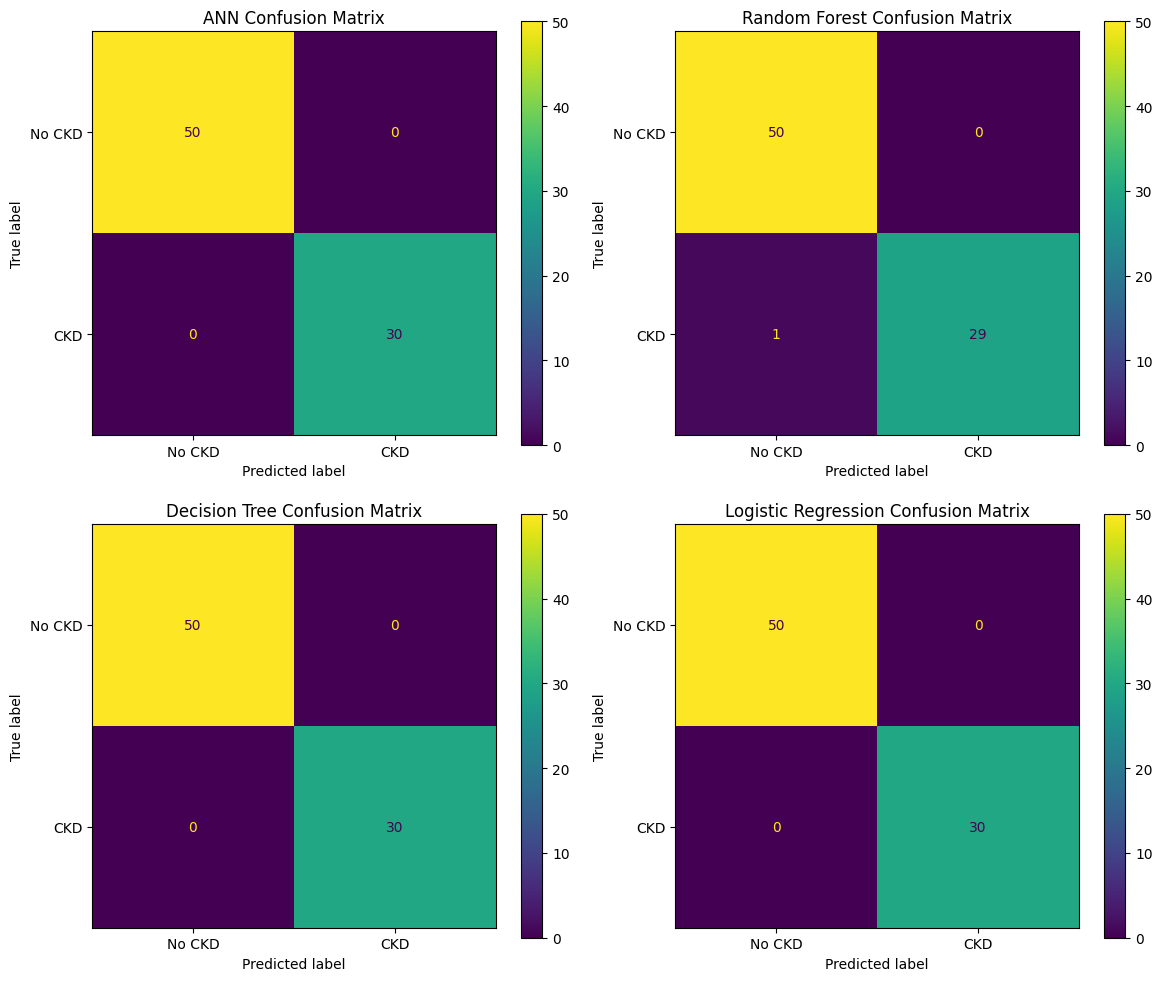

In [71]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

# Ensure y_pred_ann is already generated as a flattened array
# (Already done in your earlier step)
# y_pred_ann = (ann_model.predict(X_test_scaled) > 0.5).astype(int).flatten()

# Create confusion matrices
cm_ann = confusion_matrix(y_test, y_pred_ann)
cm_rf = confusion_matrix(y_test, y_pred_rf)
cm_dt = confusion_matrix(y_test, y_pred_dt)
cm_lr = confusion_matrix(y_test, y_pred_lr)

# Plotting confusion matrices
fig, axes = plt.subplots(2, 2, figsize=(12, 10))

ConfusionMatrixDisplay(cm_ann, display_labels=["No CKD", "CKD"]).plot(ax=axes[0, 0])
axes[0, 0].set_title("ANN Confusion Matrix")

ConfusionMatrixDisplay(cm_rf, display_labels=["No CKD", "CKD"]).plot(ax=axes[0, 1])
axes[0, 1].set_title("Random Forest Confusion Matrix")

ConfusionMatrixDisplay(cm_dt, display_labels=["No CKD", "CKD"]).plot(ax=axes[1, 0])
axes[1, 0].set_title("Decision Tree Confusion Matrix")

ConfusionMatrixDisplay(cm_lr, display_labels=["No CKD", "CKD"]).plot(ax=axes[1, 1])
axes[1, 1].set_title("Logistic Regression Confusion Matrix")

# Adjust layout
plt.tight_layout()
plt.show()


In [72]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

models = {
    "ANN": y_pred_ann,
    "Random Forest": y_pred_rf,
    "Decision Tree": y_pred_dt,
    "Logistic Regression": y_pred_lr
}

# Evaluate each model
for model_name, y_pred in models.items():
    acc = accuracy_score(y_test, y_pred)
    prec = precision_score(y_test, y_pred)
    rec = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)

    print(f"🔍 {model_name} Evaluation:")
    print(f"  ✅ Accuracy:  {acc:.4f}")
    print(f"  🎯 Precision: {prec:.4f}")
    print(f"  🔁 Recall:    {rec:.4f}")
    print(f"  🧠 F1 Score:  {f1:.4f}")
    print("-" * 40)


🔍 ANN Evaluation:
  ✅ Accuracy:  1.0000
  🎯 Precision: 1.0000
  🔁 Recall:    1.0000
  🧠 F1 Score:  1.0000
----------------------------------------
🔍 Random Forest Evaluation:
  ✅ Accuracy:  0.9875
  🎯 Precision: 1.0000
  🔁 Recall:    0.9667
  🧠 F1 Score:  0.9831
----------------------------------------
🔍 Decision Tree Evaluation:
  ✅ Accuracy:  1.0000
  🎯 Precision: 1.0000
  🔁 Recall:    1.0000
  🧠 F1 Score:  1.0000
----------------------------------------
🔍 Logistic Regression Evaluation:
  ✅ Accuracy:  1.0000
  🎯 Precision: 1.0000
  🔁 Recall:    1.0000
  🧠 F1 Score:  1.0000
----------------------------------------


In [75]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming 'results_df' already exists from your earlier processing

# Drop 'fit_time' and 'score_time' columns if they exist
results_df = results_df.drop(columns=["fit_time", "score_time"], errors='ignore')

# Reshape the DataFrame to long format for Seaborn
results_long = pd.melt(results_df, id_vars="model", var_name="metric", value_name="values")

# Prettify the metric names for display
results_long["metric"] = (
    results_long["metric"]
    .str.replace("test_", "")
    .str.replace("_", " ")
    .str.title()
)

# Set plot style
plt.figure(figsize=(16, 10))
sns.set(style="whitegrid", font_scale=1.2)

# Create the barplot
bar_plot = sns.barplot(
    x="model",
    y="values",
    hue="metric",
    data=results_long,
    palette="Set3"
)

# Add labels and legend
plt.title("Comparison of Classification Metrics by Model", fontsize=16)
plt.ylabel("Scores")
plt.xlabel("Model")
plt.legend(title="Metric", bbox_to_anchor=(1.05, 1), loc='upper left')
plt.xticks(rotation=45)
plt.tight_layout()

# Show plot
plt.show()


NameError: name 'results_df' is not defined

In [76]:
print(y.head())
print(y.unique())
print(y.dtype)


0   -0.780813
1   -0.780813
2   -0.780813
3   -0.780813
4   -0.780813
Name: target, dtype: float64
[-0.78081285  0.25337636  1.28756556]
float64


In [77]:
print(df.columns)


Index(['id', 'age', 'bp', 'sg', 'al', 'su', 'rbc', 'pc', 'pcc', 'ba', 'bgr',
       'bu', 'sc', 'sod', 'pot', 'hemo', 'pcv', 'wc', 'rc', 'htn', 'dm', 'cad',
       'appet', 'pe', 'ane', 'classification'],
      dtype='object')


In [78]:
X = df.drop('classification', axis=1)
y_original = df['classification']


In [79]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
y = le.fit_transform(y_original)  # Transforms 'ckd'/'notckd' to 0/1


In [80]:
df = df.drop('id', axis=1)


In [81]:
# Fill numeric columns with median and categorical with mode
for col in df.columns:
    if df[col].dtype == 'object':
        df[col] = df[col].fillna(df[col].mode()[0])
    else:
        df[col] = df[col].fillna(df[col].median())


In [82]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()

# Apply Label Encoding to all object (categorical) columns
for col in df.columns:
    if df[col].dtype == 'object':
        df[col] = le.fit_transform(df[col])


In [83]:
X = df.drop('classification', axis=1)
y = df['classification']


In [85]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [86]:
from sklearn.tree import DecisionTreeClassifier
import joblib

dt_classifier = DecisionTreeClassifier(random_state=42)
dt_classifier.fit(X_train, y_train)

# Save model
joblib.dump(dt_classifier, 'decision_tree_ckd_model.pkl')
print("✅ Model saved as 'decision_tree_ckd_model.pkl'")


✅ Model saved as 'decision_tree_ckd_model.pkl'


In [87]:
# Load and test
model = joblib.load('decision_tree_ckd_model.pkl')
predictions = model.predict(X_test)

from sklearn.metrics import accuracy_score
print("Accuracy:", accuracy_score(y_test, predictions))


Accuracy: 0.9875


In [88]:
from sklearn.preprocessing import LabelEncoder

# List of categorical columns
categorical_cols = ['rbc', 'pc', 'pcc', 'ba', 'htn', 'dm', 'cad', 'appet', 'pe', 'ane']

label_encoders = {}  # Dictionary to store encoders

# Apply LabelEncoder and store each encoder
for col in categorical_cols:
    le = LabelEncoder()
    df[col] = le.fit_transform(df[col].astype(str))
    label_encoders[col] = le


In [89]:
X = df.drop(['classification'], axis=1)
y = df['classification']

# Encode the target column
target_le = LabelEncoder()
y = target_le.fit_transform(y)
label_encoders['target'] = target_le

# Train-test split and model
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

dt_classifier = DecisionTreeClassifier(random_state=42)
dt_classifier.fit(X_train, y_train)


DecisionTreeClassifier(random_state=42)

In [90]:
import joblib

joblib.dump(dt_classifier, 'ckd_decision_tree_model.pkl')
joblib.dump(label_encoders, 'label_encoders.pkl')


['label_encoders.pkl']

In [91]:
import joblib

# Save the trained model
joblib.dump(model, 'ckd_model.pkl')

# Save the label encoders
joblib.dump(label_encoders, 'label_encoders.pkl')

# Save the scaler
joblib.dump(scaler, 'scaler.pkl')


['scaler.pkl']

In [93]:
import joblib

# Assuming your trained model is called `model`
joblib.dump(model, "ckd_model.joblib")


['ckd_model.joblib']